# **Linear Algebra  in DS and ML**

## Linear Algebra Pipeline Using the 5W1H Framework

This pipeline is structured around the **5W1H (Who, What, When, Where, Why, How)** framework to explain core Linear Algebra concepts, supported by a practical demonstration using a synthetic Titanic dataset.

### **Who — Introduction to Linear Algebra Users**
The pipeline begins by identifying professionals and fields that heavily rely on linear algebra, including **Data Scientists, Engineers, Computer Graphics specialists, AI researchers, and statisticians**. Their work depends on mathematical structures to process, analyze, and transform data efficiently.

### **What — Definition of Linear Algebra**
Linear algebra is introduced through its foundational elements:

- **Vectors:** Represent magnitude and direction.
- **Matrices:** Structured grids used to organize and manipulate data.
- **Linear Transformations:** Operations that map vectors from one space to another.
- **Systems of Equations:** Mathematical formulations used to solve multiple variables simultaneously.
- **Eigenvalues and Eigenvectors:** Key tools for understanding variance, stability, and transformations in data.

Visual examples help reinforce these concepts for intuitive understanding.

### **When — Application in the Data Science Workflow**
The pipeline illustrates when linear algebra is used across a typical data science lifecycle:

1. Data collection  
2. Data preprocessing  
3. Feature engineering  
4. Model building  
5. Evaluation  

At each stage, matrix operations and vector computations enable scalable and efficient analysis.

### **Where — Domains of Application**
Linear algebra powers multiple technological domains, including:

- **Machine Learning**
- **Computer Vision**
- **Natural Language Processing**
- **Recommendation Systems**
- **Robotics**
- **Signal Processing**

These areas depend on matrix computations for pattern extraction, predictions, and automation.

### **Why — Importance of Linear Algebra**
The significance of linear algebra in data science stems from several advantages:

- **Efficiency through vectorization**
- **Dimensionality reduction for handling large datasets**
- **Pattern recognition**
- **Optimization of algorithms**
- **Improved computational performance**

Together, these capabilities make it a foundational pillar of modern analytics and AI systems.

### **How — Practical Application with a Synthetic Titanic Dataset**

#### **Step 1: Data as a Matrix**
The synthetic Titanic dataset is loaded, and relevant numerical features are transformed into a **data matrix**. This representation reveals the dataset’s structure and allows for mathematical manipulation.

#### **Step 2: Normalization**
Features are standardized using linear transformations. Normalization ensures consistent feature scales, improving model stability and performance.

#### **Step 3: PCA (Dimensionality Reduction)**
**Principal Component Analysis (PCA)** is applied to reduce dimensionality while preserving the dataset’s variance. This demonstrates how complex datasets can be simplified without losing critical information.

#### **Step 4: Linear Regression**
Linear regression is implemented using matrix operations via the **Normal Equation** to predict survival outcomes. This step highlights how many machine learning algorithms are fundamentally rooted in linear algebra.

#### **Step 5: Distance Metrics**
Multiple distance metrics are computed between sample passengers:

- **Euclidean Distance**
- **Manhattan Distance**
- **Cosine Similarity**

These measures are essential for similarity detection, clustering, and recommendation models.

### **Comprehensive Summary Report**
The pipeline concludes with a consolidated summary that integrates insights from each 5W1H component alongside the Titanic dataset demonstration. The result is a cohesive, visually structured overview that connects theoretical foundations with real-world application.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from mpl_toolkits.mplot3d import Axes3D
import warnings
import os
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

class LinearAlgebra5W1H:
    """
    A comprehensive class to demonstrate Linear Algebra concepts
    using the 5W1H framework with visualizations
    """

    def __init__(self):
        """Initialize the class with Titanic dataset"""
        self.data = None
        self.numerical_data = None
        self.target = None

    # ========================================================================
    # WHO: Who uses Linear Algebra?
    # ========================================================================
    def who_uses_linear_algebra(self):
        """
        Demonstrates WHO uses linear algebra in various fields
        """
        print("\n" + "="*70)
        print("WHO USES LINEAR ALGEBRA?")
        print("="*70)

        users = {
            'Data Scientists': 'Machine Learning, PCA, Regression',
            'Engineers': 'Signal Processing, Control Systems',
            'Physicists': 'Quantum Mechanics, Relativity',
            'Computer Graphics': '3D Transformations, Gaming',
            'Economists': 'Input-Output Models, Optimization',
            'Cryptographers': 'Encryption Algorithms'
        }

        for profession, application in users.items():
            print(f"✓ {profession:20s} → {application}")

        # Visualization
        fig, ax = plt.subplots(figsize=(12, 6))
        professions = list(users.keys())
        y_pos = np.arange(len(professions))

        ax.barh(y_pos, [1]*len(professions), color=plt.cm.viridis(np.linspace(0, 1, len(professions))))
        ax.set_yticks(y_pos)
        ax.set_yticklabels(professions)
        ax.set_xlabel('Application Areas', fontsize=12)
        ax.set_title('WHO Uses Linear Algebra?', fontsize=14, fontweight='bold')
        ax.set_xlim(0, 1.5)

        for i, (prof, app) in enumerate(users.items()):
            ax.text(1.05, i, app, va='center', fontsize=9)

        plt.tight_layout()
        plt.savefig('/mnt/user-data/outputs/01_who_uses_linear_algebra.png', dpi=300, bbox_inches='tight')
        print("\n✓ Visualization saved: 01_who_uses_linear_algebra.png")
        plt.close()

    # ========================================================================
    # WHAT: What is Linear Algebra?
    # ========================================================================
    def what_is_linear_algebra(self):
        """
        Demonstrates WHAT linear algebra is with fundamental concepts
        """
        print("\n" + "="*70)
        print("WHAT IS LINEAR ALGEBRA?")
        print("="*70)

        print("\nLinear Algebra is the branch of mathematics concerning:")
        print("• Vectors and Vector Spaces")
        print("• Matrices and Linear Transformations")
        print("• Systems of Linear Equations")
        print("• Eigenvalues and Eigenvectors")

        # Create visualizations for core concepts
        fig = plt.figure(figsize=(16, 10))

        # 1. Vectors
        ax1 = fig.add_subplot(2, 3, 1)
        v1 = np.array([3, 2])
        v2 = np.array([1, 3])
        ax1.quiver(0, 0, v1[0], v1[1], angles='xy', scale_units='xy', scale=1, color='red', width=0.01, label='v₁ = [3, 2]')
        ax1.quiver(0, 0, v2[0], v2[1], angles='xy', scale_units='xy', scale=1, color='blue', width=0.01, label='v₂ = [1, 3]')
        ax1.quiver(0, 0, (v1+v2)[0], (v1+v2)[1], angles='xy', scale_units='xy', scale=1, color='green', width=0.01, label='v₁ + v₂')
        ax1.set_xlim(-1, 5)
        ax1.set_ylim(-1, 6)
        ax1.grid(True, alpha=0.3)
        ax1.set_title('1. VECTORS: Basic Building Blocks', fontweight='bold')
        ax1.legend()
        ax1.set_xlabel('x')
        ax1.set_ylabel('y')

        # 2. Matrix
        ax2 = fig.add_subplot(2, 3, 2)
        matrix = np.array([[2, 1], [1, 3]])
        im = ax2.imshow(matrix, cmap='coolwarm', aspect='auto')
        ax2.set_title('2. MATRIX: Array of Numbers', fontweight='bold')
        for i in range(2):
            for j in range(2):
                ax2.text(j, i, f'{matrix[i, j]}', ha='center', va='center', fontsize=20, fontweight='bold')
        ax2.set_xticks([0, 1])
        ax2.set_yticks([0, 1])
        plt.colorbar(im, ax=ax2)

        # 3. Linear Transformation
        ax3 = fig.add_subplot(2, 3, 3)
        theta = np.pi / 4  # 45 degrees
        rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)],
                                   [np.sin(theta), np.cos(theta)]])
        original = np.array([[1, 0], [0, 1], [1, 1]])
        transformed = original @ rotation_matrix.T

        ax3.scatter(original[:, 0], original[:, 1], c='blue', s=100, label='Original', zorder=3)
        ax3.scatter(transformed[:, 0], transformed[:, 1], c='red', s=100, label='Rotated 45°', zorder=3)
        for i in range(len(original)):
            ax3.annotate('', xy=transformed[i], xytext=original[i],
                        arrowprops=dict(arrowstyle='->', lw=2, color='gray'))
        ax3.grid(True, alpha=0.3)
        ax3.set_title('3. TRANSFORMATION: Rotation', fontweight='bold')
        ax3.legend()
        ax3.axis('equal')

        # 4. System of Equations
        ax4 = fig.add_subplot(2, 3, 4)
        x = np.linspace(-2, 4, 100)
        y1 = 2 - x  # From: x + y = 2
        y2 = (3 - 2*x) / 1  # From: 2x + y = 3
        ax4.plot(x, y1, 'b-', label='x + y = 2', linewidth=2)
        ax4.plot(x, y2, 'r-', label='2x + y = 3', linewidth=2)
        ax4.plot(1, 1, 'go', markersize=15, label='Solution: (1, 1)')
        ax4.grid(True, alpha=0.3)
        ax4.set_title('4. SYSTEM OF EQUATIONS', fontweight='bold')
        ax4.legend()
        ax4.set_xlabel('x')
        ax4.set_ylabel('y')
        ax4.set_xlim(-1, 3)
        ax4.set_ylim(-1, 4)

        # 5. Eigenvalues & Eigenvectors
        ax5 = fig.add_subplot(2, 3, 5)
        A = np.array([[2, 1], [1, 2]])
        eigenvalues, eigenvectors = np.linalg.eig(A)

        # Plot eigenvectors
        for i in range(2):
            ax5.quiver(0, 0, eigenvectors[0, i], eigenvectors[1, i],
                      angles='xy', scale_units='xy', scale=1,
                      color=['red', 'blue'][i], width=0.015,
                      label=f'v{i+1} (λ={eigenvalues[i]:.2f})')
        ax5.grid(True, alpha=0.3)
        ax5.set_title('5. EIGENVECTORS & EIGENVALUES', fontweight='bold')
        ax5.legend()
        ax5.axis('equal')
        ax5.set_xlim(-1, 1)
        ax5.set_ylim(-1, 1)

        # 6. Dot Product
        ax6 = fig.add_subplot(2, 3, 6)
        v1 = np.array([2, 1])
        v2 = np.array([1, 2])
        dot_product = np.dot(v1, v2)

        ax6.quiver(0, 0, v1[0], v1[1], angles='xy', scale_units='xy', scale=1,
                  color='red', width=0.015, label=f'v₁ = {v1}')
        ax6.quiver(0, 0, v2[0], v2[1], angles='xy', scale_units='xy', scale=1,
                  color='blue', width=0.015, label=f'v₂ = {v2}')
        ax6.text(1.5, 2.5, f'v₁ · v₂ = {dot_product}', fontsize=14,
                bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.5))
        ax6.grid(True, alpha=0.3)
        ax6.set_title('6. DOT PRODUCT: Similarity Measure', fontweight='bold')
        ax6.legend()
        ax6.set_xlim(-0.5, 3)
        ax6.set_ylim(-0.5, 3)

        plt.tight_layout()
        plt.savefig('/mnt/user-data/outputs/02_what_is_linear_algebra.png', dpi=300, bbox_inches='tight')
        print("\n✓ Visualization saved: 02_what_is_linear_algebra.png")
        plt.close()

    # ========================================================================
    # WHEN: When is Linear Algebra used?
    # ========================================================================
    def when_is_linear_algebra_used(self):
        """
        Demonstrates WHEN linear algebra is used in data science pipeline
        """
        print("\n" + "="*70)
        print("WHEN IS LINEAR ALGEBRA USED?")
        print("="*70)

        pipeline_stages = [
            'Data Collection',
            'Data Preprocessing\n(Normalization)',
            'Feature Engineering\n(PCA)',
            'Model Training\n(Linear Regression)',
            'Prediction\n(Matrix Multiplication)',
            'Evaluation\n(Distance Metrics)'
        ]

        print("\nLinear Algebra is used throughout the Data Science Pipeline:")
        for i, stage in enumerate(pipeline_stages, 1):
            print(f"{i}. {stage.replace(chr(10), ' ')}")

        # Create pipeline visualization
        fig, ax = plt.subplots(figsize=(14, 8))

        # Draw pipeline stages
        for i, stage in enumerate(pipeline_stages):
            x = i * 2
            # Draw box
            rect = plt.Rectangle((x, 4), 1.5, 2, facecolor=plt.cm.viridis(i/len(pipeline_stages)),
                                edgecolor='black', linewidth=2)
            ax.add_patch(rect)
            # Add text
            ax.text(x + 0.75, 5, stage, ha='center', va='center', fontsize=10,
                   fontweight='bold', wrap=True)

            # Add arrow between stages
            if i < len(pipeline_stages) - 1:
                ax.annotate('', xy=(x + 2, 5), xytext=(x + 1.5, 5),
                           arrowprops=dict(arrowstyle='->', lw=2, color='black'))

        # Add linear algebra operations below each stage
        operations = [
            'Data Matrix\nX ∈ ℝⁿˣᵐ',
            'Z = (X - μ) / σ\nStandardization',
            'X\' = X · W\nProjection',
            'y = Xβ + ε\nLeast Squares',
            'ŷ = Xβ̂\nMatrix-Vector',
            '||y - ŷ||\nNorm Calculation'
        ]

        for i, op in enumerate(operations):
            x = i * 2
            ax.text(x + 0.75, 2.5, op, ha='center', va='center', fontsize=9,
                   bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8))

        ax.set_xlim(-0.5, 12)
        ax.set_ylim(0, 8)
        ax.axis('off')
        ax.set_title('WHEN: Linear Algebra in Data Science Pipeline',
                    fontsize=16, fontweight='bold', pad=20)

        plt.tight_layout()
        plt.savefig('/mnt/user-data/outputs/03_when_is_linear_algebra_used.png', dpi=300, bbox_inches='tight')
        print("\n✓ Visualization saved: 03_when_is_linear_algebra_used.png")
        plt.close()

    # ========================================================================
    # WHERE: Where is Linear Algebra applied?
    # ========================================================================
    def where_is_linear_algebra_applied(self):
        """
        Demonstrates WHERE linear algebra is applied across domains
        """
        print("\n" + "="*70)
        print("WHERE IS LINEAR ALGEBRA APPLIED?")
        print("="*70)

        applications = {
            'Machine Learning': ['Neural Networks', 'PCA', 'SVM', 'Regression'],
            'Computer Vision': ['Image Processing', 'Face Recognition', '3D Graphics'],
            'Natural Language': ['Word Embeddings', 'Topic Modeling', 'Transformers'],
            'Recommendation': ['Collaborative Filtering', 'Matrix Factorization'],
            'Signal Processing': ['Fourier Transform', 'Filtering', 'Compression'],
            'Optimization': ['Linear Programming', 'Gradient Descent']
        }

        for domain, apps in applications.items():
            print(f"\n{domain}:")
            for app in apps:
                print(f"  • {app}")

        # Create radial visualization
        fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(projection='polar'))

        domains = list(applications.keys())
        num_domains = len(domains)
        angles = np.linspace(0, 2 * np.pi, num_domains, endpoint=False).tolist()

        # Plot domains
        for i, (domain, angle) in enumerate(zip(domains, angles)):
            # Main domain
            ax.plot([angle, angle], [0, 1], 'o-', linewidth=3, markersize=15,
                   color=plt.cm.tab10(i), label=domain)

            # Applications
            apps = applications[domain]
            for j, app in enumerate(apps):
                r = 1.2 + j * 0.15
                ax.text(angle, r, app, ha='center', va='center', fontsize=8,
                       bbox=dict(boxstyle='round', facecolor=plt.cm.tab10(i), alpha=0.3))

        ax.set_ylim(0, 2)
        ax.set_title('WHERE: Linear Algebra Application Domains',
                    fontsize=16, fontweight='bold', pad=30)
        ax.grid(True, alpha=0.3)
        ax.set_theta_zero_location('N')

        plt.tight_layout()
        plt.savefig('/mnt/user-data/outputs/04_where_is_linear_algebra_applied.png', dpi=300, bbox_inches='tight')
        print("\n✓ Visualization saved: 04_where_is_linear_algebra_applied.png")
        plt.close()

    # ========================================================================
    # WHY: Why is Linear Algebra important?
    # ========================================================================
    def why_is_linear_algebra_important(self):
        """
        Demonstrates WHY linear algebra is crucial for data science
        """
        print("\n" + "="*70)
        print("WHY IS LINEAR ALGEBRA IMPORTANT?")
        print("="*70)

        reasons = {
            'Efficiency': 'Vectorization is 100x faster than loops',
            'Dimensionality Reduction': 'Reduce 1000 features to 10 principal components',
            'Pattern Recognition': 'Find hidden structures in data',
            'Optimization': 'Minimize error in machine learning models',
            'Data Representation': 'Represent complex data compactly',
            'Computational Power': 'GPUs excel at matrix operations'
        }

        for reason, explanation in reasons.items():
            print(f"\n✓ {reason}:")
            print(f"  {explanation}")

        # Create comparison visualization
        fig, axes = plt.subplots(2, 2, figsize=(14, 10))

        # 1. Speed comparison: Loop vs Vectorization
        ax = axes[0, 0]
        sizes = [100, 1000, 10000, 100000]
        loop_times = [0.01, 0.1, 1.0, 10.0]  # Simulated
        vector_times = [0.0001, 0.001, 0.01, 0.1]  # Simulated

        x = np.arange(len(sizes))
        width = 0.35
        ax.bar(x - width/2, loop_times, width, label='Loop', color='red', alpha=0.7)
        ax.bar(x + width/2, vector_times, width, label='Vectorized', color='green', alpha=0.7)
        ax.set_ylabel('Time (seconds)', fontsize=12)
        ax.set_xlabel('Array Size', fontsize=12)
        ax.set_title('WHY: Efficiency - Vectorization Speed', fontweight='bold')
        ax.set_xticks(x)
        ax.set_xticklabels(sizes)
        ax.legend()
        ax.set_yscale('log')
        ax.grid(True, alpha=0.3)

        # 2. Dimensionality Reduction
        ax = axes[0, 1]
        original_dims = 100
        pca_dims = [1, 2, 5, 10, 20, 50]
        variance_explained = [0.35, 0.55, 0.75, 0.85, 0.92, 0.98]  # Simulated

        ax.plot(pca_dims, variance_explained, 'o-', linewidth=3, markersize=10, color='purple')
        ax.fill_between(pca_dims, variance_explained, alpha=0.3, color='purple')
        ax.axhline(y=0.95, color='red', linestyle='--', label='95% Threshold')
        ax.set_xlabel('Number of Components', fontsize=12)
        ax.set_ylabel('Variance Explained', fontsize=12)
        ax.set_title('WHY: Dimensionality Reduction Power', fontweight='bold')
        ax.grid(True, alpha=0.3)
        ax.legend()

        # 3. Pattern Recognition
        ax = axes[1, 0]
        np.random.seed(42)
        # Create clustered data
        cluster1 = np.random.randn(50, 2) + [2, 2]
        cluster2 = np.random.randn(50, 2) + [-2, -2]
        cluster3 = np.random.randn(50, 2) + [2, -2]

        ax.scatter(cluster1[:, 0], cluster1[:, 1], c='red', s=50, alpha=0.6, label='Cluster 1')
        ax.scatter(cluster2[:, 0], cluster2[:, 1], c='blue', s=50, alpha=0.6, label='Cluster 2')
        ax.scatter(cluster3[:, 0], cluster3[:, 1], c='green', s=50, alpha=0.6, label='Cluster 3')
        ax.set_title('WHY: Pattern Recognition via Linear Algebra', fontweight='bold')
        ax.legend()
        ax.grid(True, alpha=0.3)

        # 4. Optimization
        ax = axes[1, 1]
        iterations = np.arange(0, 50)
        loss = 100 * np.exp(-0.1 * iterations) + 5  # Simulated convergence

        ax.plot(iterations, loss, linewidth=3, color='orange')
        ax.fill_between(iterations, loss, alpha=0.3, color='orange')
        ax.set_xlabel('Iterations', fontsize=12)
        ax.set_ylabel('Loss', fontsize=12)
        ax.set_title('WHY: Optimization - Gradient Descent', fontweight='bold')
        ax.grid(True, alpha=0.3)
        ax.axhline(y=5, color='red', linestyle='--', label='Minimum')
        ax.legend()

        plt.tight_layout()
        plt.savefig('/mnt/user-data/outputs/05_why_is_linear_algebra_important.png', dpi=300, bbox_inches='tight')
        print("\n✓ Visualization saved: 05_why_is_linear_algebra_important.png")
        plt.close()

    # ========================================================================
    # HOW: How to apply Linear Algebra (with Titanic Dataset)
    # ========================================================================
    def load_titanic_data(self):
        """
        Load and prepare Titanic dataset
        """
        print("\n" + "="*70)
        print("LOADING TITANIC DATASET")
        print("="*70)

        # Create a sample Titanic dataset
        np.random.seed(42)
        n_samples = 891

        # Generate synthetic Titanic-like data
        self.data = pd.DataFrame({
            'PassengerId': range(1, n_samples + 1),
            'Survived': np.random.binomial(1, 0.38, n_samples),
            'Pclass': np.random.choice([1, 2, 3], n_samples, p=[0.24, 0.21, 0.55]),
            'Age': np.random.gamma(2, 15, n_samples).clip(0.42, 80),
            'SibSp': np.random.poisson(0.5, n_samples),
            'Parch': np.random.poisson(0.38, n_samples),
            'Fare': np.random.gamma(2, 16, n_samples).clip(0, 512)
        })

        # Add some missing values to Age
        age_missing_idx = np.random.choice(n_samples, int(n_samples * 0.2), replace=False)
        self.data.loc[age_missing_idx, 'Age'] = np.nan

        print(f"\n✓ Dataset loaded: {self.data.shape[0]} passengers, {self.data.shape[1]} features")
        print(f"\n{self.data.head()}")
        print(f"\n{self.data.describe()}")

        return self.data

    def how_apply_linear_algebra_step1_data_matrix(self):
        """
        Step 1: Represent data as a matrix
        """
        print("\n" + "="*70)
        print("HOW: STEP 1 - DATA AS MATRIX")
        print("="*70)

        # Fill missing values
        self.data['Age'].fillna(self.data['Age'].median(), inplace=True)

        # Select numerical features
        features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
        self.numerical_data = self.data[features].values
        self.target = self.data['Survived'].values

        print(f"\n✓ Data Matrix X shape: {self.numerical_data.shape}")
        print(f"  - Rows (passengers): {self.numerical_data.shape[0]}")
        print(f"  - Columns (features): {self.numerical_data.shape[1]}")
        print(f"\n✓ Target Vector y shape: {self.target.shape}")

        print(f"\nFirst 5 rows of data matrix:")
        print(self.numerical_data[:5])

        # Visualization
        fig, axes = plt.subplots(1, 2, figsize=(14, 6))

        # Matrix heatmap
        ax = axes[0]
        im = ax.imshow(self.numerical_data[:20], aspect='auto', cmap='viridis')
        ax.set_title('Data Matrix X (first 20 passengers)', fontweight='bold', fontsize=14)
        ax.set_xlabel('Features', fontsize=12)
        ax.set_ylabel('Passengers', fontsize=12)
        ax.set_xticks(range(len(features)))
        ax.set_xticklabels(features, rotation=45)
        plt.colorbar(im, ax=ax)

        # Feature distributions
        ax = axes[1]
        positions = range(len(features))
        bp = ax.boxplot([self.numerical_data[:, i] for i in range(len(features))],
                        positions=positions, patch_artist=True)
        for patch, color in zip(bp['boxes'], plt.cm.viridis(np.linspace(0, 1, len(features)))):
            patch.set_facecolor(color)
        ax.set_xticklabels(features, rotation=45)
        ax.set_title('Feature Distributions', fontweight='bold', fontsize=14)
        ax.set_ylabel('Value', fontsize=12)
        ax.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.savefig('/mnt/user-data/outputs/06_step1_data_matrix.png', dpi=300, bbox_inches='tight')
        print("\n✓ Visualization saved: 06_step1_data_matrix.png")
        plt.close()

    def how_apply_linear_algebra_step2_normalization(self):
        """
        Step 2: Normalize data using linear transformations
        Z = (X - μ) / σ
        """
        print("\n" + "="*70)
        print("HOW: STEP 2 - NORMALIZATION (LINEAR TRANSFORMATION)")
        print("="*70)

        # Before normalization
        print("\nBefore normalization:")
        print(f"Mean: {self.numerical_data.mean(axis=0)}")
        print(f"Std:  {self.numerical_data.std(axis=0)}")

        # Apply standardization
        scaler = StandardScaler()
        self.normalized_data = scaler.fit_transform(self.numerical_data)

        # After normalization
        print("\nAfter normalization:")
        print(f"Mean: {self.normalized_data.mean(axis=0)}")
        print(f"Std:  {self.normalized_data.std(axis=0)}")

        print("\n✓ Formula: Z = (X - μ) / σ")
        print("  - μ: mean vector (subtraction)")
        print("  - σ: standard deviation vector (division)")

        # Visualization
        fig, axes = plt.subplots(2, 3, figsize=(16, 10))
        features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

        for idx, feature in enumerate(features):
            row = idx // 3
            col = idx % 3
            ax = axes[row, col]

            # Before normalization
            ax.hist(self.numerical_data[:, idx], bins=30, alpha=0.5,
                   color='red', label='Original', density=True)

            # After normalization
            ax.hist(self.normalized_data[:, idx], bins=30, alpha=0.5,
                   color='blue', label='Normalized', density=True)

            ax.set_title(f'{feature}', fontweight='bold')
            ax.set_xlabel('Value')
            ax.set_ylabel('Density')
            ax.legend()
            ax.grid(True, alpha=0.3)

        # Remove extra subplot
        axes[1, 2].remove()

        # Add formula explanation
        ax = fig.add_subplot(2, 3, 6)
        ax.axis('off')
        formula_text = """
        NORMALIZATION FORMULA

        Z = (X - μ) / σ

        Where:
        • X: Original data matrix
        • μ: Mean vector
        • σ: Std deviation vector
        • Z: Normalized data

        Benefits:
        ✓ All features on same scale
        ✓ Faster convergence
        ✓ Better model performance
        """
        ax.text(0.1, 0.5, formula_text, fontsize=11, verticalalignment='center',
               bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8))

        plt.tight_layout()
        plt.savefig('/mnt/user-data/outputs/07_step2_normalization.png', dpi=300, bbox_inches='tight')
        print("\n✓ Visualization saved: 07_step2_normalization.png")
        plt.close()

    def how_apply_linear_algebra_step3_pca(self):
        """
        Step 3: Dimensionality reduction using PCA
        X' = X · W (matrix multiplication)
        """
        print("\n" + "="*70)
        print("HOW: STEP 3 - PCA (PRINCIPAL COMPONENT ANALYSIS)")
        print("="*70)

        # Apply PCA
        pca = PCA()
        pca_data = pca.fit_transform(self.normalized_data)

        print(f"\n✓ Original dimensions: {self.normalized_data.shape[1]}")
        print(f"✓ PCA components: {pca.n_components_}")
        print(f"\nExplained variance ratio:")
        for i, var in enumerate(pca.explained_variance_ratio_):
            print(f"  PC{i+1}: {var:.4f} ({var*100:.2f}%)")

        cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
        print(f"\nCumulative variance:")
        for i, cum_var in enumerate(cumulative_variance):
            print(f"  First {i+1} components: {cum_var:.4f} ({cum_var*100:.2f}%)")

        # Visualization
        fig = plt.figure(figsize=(16, 10))

        # 1. Scree plot
        ax1 = fig.add_subplot(2, 3, 1)
        ax1.bar(range(1, len(pca.explained_variance_ratio_)+1),
               pca.explained_variance_ratio_, color='steelblue', alpha=0.7)
        ax1.plot(range(1, len(pca.explained_variance_ratio_)+1),
                pca.explained_variance_ratio_, 'ro-', linewidth=2)
        ax1.set_xlabel('Principal Component', fontsize=12)
        ax1.set_ylabel('Explained Variance Ratio', fontsize=12)
        ax1.set_title('Scree Plot', fontweight='bold')
        ax1.grid(True, alpha=0.3)

        # 2. Cumulative variance
        ax2 = fig.add_subplot(2, 3, 2)
        ax2.plot(range(1, len(cumulative_variance)+1), cumulative_variance,
                'bo-', linewidth=3, markersize=8)
        ax2.fill_between(range(1, len(cumulative_variance)+1), cumulative_variance,
                         alpha=0.3, color='blue')
        ax2.axhline(y=0.95, color='red', linestyle='--', linewidth=2, label='95% Threshold')
        ax2.set_xlabel('Number of Components', fontsize=12)
        ax2.set_ylabel('Cumulative Variance Explained', fontsize=12)
        ax2.set_title('Cumulative Variance Explained', fontweight='bold')
        ax2.legend()
        ax2.grid(True, alpha=0.3)

        # 3. 2D PCA projection (PC1 vs PC2)
        ax3 = fig.add_subplot(2, 3, 3)
        scatter = ax3.scatter(pca_data[:, 0], pca_data[:, 1], c=self.target,
                             cmap='RdYlBu', alpha=0.6, s=30)
        ax3.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)', fontsize=12)
        ax3.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)', fontsize=12)
        ax3.set_title('2D PCA Projection', fontweight='bold')
        plt.colorbar(scatter, ax=ax3, label='Survived')
        ax3.grid(True, alpha=0.3)

        # 4. Component loadings heatmap
        ax4 = fig.add_subplot(2, 3, 4)
        features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
        im = ax4.imshow(pca.components_[:3], aspect='auto', cmap='RdBu_r', vmin=-1, vmax=1)
        ax4.set_xticks(range(len(features)))
        ax4.set_xticklabels(features, rotation=45)
        ax4.set_yticks(range(3))
        ax4.set_yticklabels([f'PC{i+1}' for i in range(3)])
        ax4.set_title('Component Loadings (First 3 PCs)', fontweight='bold')
        plt.colorbar(im, ax=ax4)

        # Add values to heatmap
        for i in range(3):
            for j in range(len(features)):
                text = ax4.text(j, i, f'{pca.components_[i, j]:.2f}',
                              ha="center", va="center", color="black", fontsize=9)

        # 5. 3D PCA projection
        ax5 = fig.add_subplot(2, 3, 5, projection='3d')
        scatter = ax5.scatter(pca_data[:, 0], pca_data[:, 1], pca_data[:, 2],
                             c=self.target, cmap='RdYlBu', alpha=0.6, s=20)
        ax5.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
        ax5.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
        ax5.set_zlabel(f'PC3 ({pca.explained_variance_ratio_[2]*100:.1f}%)')
        ax5.set_title('3D PCA Projection', fontweight='bold')

        # 6. PCA formula explanation
        ax6 = fig.add_subplot(2, 3, 6)
        ax6.axis('off')
        formula_text = """
        PCA ALGORITHM

        1. Center the data: X̄ = X - μ

        2. Compute covariance: Σ = (1/n)X̄ᵀX̄

        3. Eigendecomposition: Σ = WΛWᵀ
           • W: eigenvectors (principal axes)
           • Λ: eigenvalues (variance)

        4. Project data: Z = X̄W

        Key Insights:
        ✓ Reduces dimensions while preserving variance
        ✓ Removes correlation between features
        ✓ First PCs capture most variation
        """
        ax6.text(0.1, 0.5, formula_text, fontsize=10, verticalalignment='center',
               bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))

        plt.tight_layout()
        plt.savefig('/mnt/user-data/outputs/08_step3_pca.png', dpi=300, bbox_inches='tight')
        print("\n✓ Visualization saved: 08_step3_pca.png")
        plt.close()

        # Store PCA data for later use
        self.pca_data = pca_data[:, :2]  # Use first 2 components

    def how_apply_linear_algebra_step4_regression(self):
        """
        Step 4: Linear regression using matrix operations
        β = (XᵀX)⁻¹Xᵀy
        """
        print("\n" + "="*70)
        print("HOW: STEP 4 - LINEAR REGRESSION")
        print("="*70)

        # Add intercept term (column of ones)
        X = np.column_stack([np.ones(len(self.normalized_data)), self.normalized_data])
        y = self.target

        # Calculate coefficients using Normal Equation: β = (XᵀX)⁻¹Xᵀy
        XtX = X.T @ X
        Xty = X.T @ y
        beta = np.linalg.inv(XtX) @ Xty

        print("\n✓ Normal Equation: β = (XᵀX)⁻¹Xᵀy")
        print(f"\nCoefficients:")
        print(f"  Intercept: {beta[0]:.4f}")
        features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
        for i, feature in enumerate(features):
            print(f"  {feature:10s}: {beta[i+1]:>8.4f}")

        # Predictions
        y_pred = X @ beta

        # Calculate metrics
        residuals = y - y_pred
        mse = np.mean(residuals**2)
        rmse = np.sqrt(mse)
        r2 = 1 - (np.sum(residuals**2) / np.sum((y - np.mean(y))**2))

        print(f"\n✓ Model Performance:")
        print(f"  MSE:  {mse:.4f}")
        print(f"  RMSE: {rmse:.4f}")
        print(f"  R²:   {r2:.4f}")

        # Visualization
        fig, axes = plt.subplots(2, 3, figsize=(16, 10))

        # 1. Predicted vs Actual
        ax = axes[0, 0]
        ax.scatter(y, y_pred, alpha=0.5, s=20)
        ax.plot([0, 1], [0, 1], 'r--', linewidth=2, label='Perfect Prediction')
        ax.set_xlabel('Actual Survival', fontsize=12)
        ax.set_ylabel('Predicted Survival', fontsize=12)
        ax.set_title('Predicted vs Actual', fontweight='bold')
        ax.legend()
        ax.grid(True, alpha=0.3)

        # 2. Residuals plot
        ax = axes[0, 1]
        ax.scatter(y_pred, residuals, alpha=0.5, s=20)
        ax.axhline(y=0, color='red', linestyle='--', linewidth=2)
        ax.set_xlabel('Predicted Values', fontsize=12)
        ax.set_ylabel('Residuals', fontsize=12)
        ax.set_title('Residual Plot', fontweight='bold')
        ax.grid(True, alpha=0.3)

        # 3. Coefficient importance
        ax = axes[0, 2]
        coefficients = beta[1:]  # Exclude intercept
        colors = ['green' if c > 0 else 'red' for c in coefficients]
        bars = ax.barh(features, coefficients, color=colors, alpha=0.7)
        ax.axvline(x=0, color='black', linewidth=1)
        ax.set_xlabel('Coefficient Value', fontsize=12)
        ax.set_title('Feature Coefficients', fontweight='bold')
        ax.grid(True, alpha=0.3, axis='x')

        # 4. Residuals distribution
        ax = axes[1, 0]
        ax.hist(residuals, bins=30, color='steelblue', alpha=0.7, edgecolor='black')
        ax.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Zero')
        ax.set_xlabel('Residuals', fontsize=12)
        ax.set_ylabel('Frequency', fontsize=12)
        ax.set_title('Residuals Distribution', fontweight='bold')
        ax.legend()
        ax.grid(True, alpha=0.3)

        # 5. Matrix operations visualization
        ax = axes[1, 1]
        ax.axis('off')
        matrix_text = """
        NORMAL EQUATION

        β = (XᵀX)⁻¹Xᵀy

        Step by step:
        1. XᵀX: Compute X transpose times X
           → Square matrix (features × features)

        2. (XᵀX)⁻¹: Invert the matrix
           → Use for solving system

        3. Xᵀy: Compute X transpose times y
           → Column vector

        4. β = (XᵀX)⁻¹Xᵀy: Final coefficients
           → Optimal solution
        """
        ax.text(0.1, 0.5, matrix_text, fontsize=10, verticalalignment='center',
               bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8),
               family='monospace')

        # 6. Model performance metrics
        ax = axes[1, 2]
        ax.axis('off')
        metrics_text = f"""
        MODEL METRICS

        Mean Squared Error (MSE):
        MSE = (1/n)Σ(y - ŷ)²
        = {mse:.4f}

        Root Mean Squared Error (RMSE):
        RMSE = √MSE
        = {rmse:.4f}

        R² Score:
        R² = 1 - (SS_res / SS_tot)
        = {r2:.4f}

        Interpretation:
        • Lower MSE/RMSE = Better fit
        • R² closer to 1 = Better fit
        """
        ax.text(0.1, 0.5, metrics_text, fontsize=10, verticalalignment='center',
               bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8),
               family='monospace')

        plt.tight_layout()
        plt.savefig('/mnt/user-data/outputs/09_step4_regression.png', dpi=300, bbox_inches='tight')
        print("\n✓ Visualization saved: 09_step4_regression.png")
        plt.close()

    def how_apply_linear_algebra_step5_distance_metrics(self):
        """
        Step 5: Distance metrics and similarity measures
        """
        print("\n" + "="*70)
        print("HOW: STEP 5 - DISTANCE METRICS")
        print("="*70)

        # Select a few sample passengers
        sample_indices = [0, 100, 200, 300, 400]
        samples = self.normalized_data[sample_indices]

        # Calculate different distance metrics
        print("\nDistance Metrics between passengers:")

        # Euclidean distance: ||a - b||₂
        euclidean = np.zeros((len(samples), len(samples)))
        for i in range(len(samples)):
            for j in range(len(samples)):
                euclidean[i, j] = np.linalg.norm(samples[i] - samples[j])

        # Manhattan distance: ||a - b||₁
        manhattan = np.zeros((len(samples), len(samples)))
        for i in range(len(samples)):
            for j in range(len(samples)):
                manhattan[i, j] = np.sum(np.abs(samples[i] - samples[j]))

        # Cosine similarity: (a·b) / (||a|| ||b||)
        cosine_sim = np.zeros((len(samples), len(samples)))
        for i in range(len(samples)):
            for j in range(len(samples)):
                dot_product = np.dot(samples[i], samples[j])
                norm_product = np.linalg.norm(samples[i]) * np.linalg.norm(samples[j])
                cosine_sim[i, j] = dot_product / norm_product if norm_product > 0 else 0

        print(f"\n✓ Euclidean Distance Matrix:")
        print(euclidean)
        print(f"\n✓ Manhattan Distance Matrix:")
        print(manhattan)
        print(f"\n✓ Cosine Similarity Matrix:")
        print(cosine_sim)

        # Visualization
        fig, axes = plt.subplots(2, 3, figsize=(16, 10))

        # 1. Euclidean distance heatmap
        ax = axes[0, 0]
        im = ax.imshow(euclidean, cmap='YlOrRd', aspect='auto')
        ax.set_title('Euclidean Distance\n||a - b||₂', fontweight='bold')
        ax.set_xlabel('Passenger')
        ax.set_ylabel('Passenger')
        plt.colorbar(im, ax=ax)
        for i in range(len(samples)):
            for j in range(len(samples)):
                ax.text(j, i, f'{euclidean[i,j]:.2f}', ha='center', va='center', fontsize=9)

        # 2. Manhattan distance heatmap
        ax = axes[0, 1]
        im = ax.imshow(manhattan, cmap='YlGnBu', aspect='auto')
        ax.set_title('Manhattan Distance\n||a - b||₁', fontweight='bold')
        ax.set_xlabel('Passenger')
        ax.set_ylabel('Passenger')
        plt.colorbar(im, ax=ax)
        for i in range(len(samples)):
            for j in range(len(samples)):
                ax.text(j, i, f'{manhattan[i,j]:.2f}', ha='center', va='center', fontsize=9)

        # 3. Cosine similarity heatmap
        ax = axes[0, 2]
        im = ax.imshow(cosine_sim, cmap='RdYlGn', aspect='auto', vmin=-1, vmax=1)
        ax.set_title('Cosine Similarity\n(a·b)/(||a||||b||)', fontweight='bold')
        ax.set_xlabel('Passenger')
        ax.set_ylabel('Passenger')
        plt.colorbar(im, ax=ax)
        for i in range(len(samples)):
            for j in range(len(samples)):
                ax.text(j, i, f'{cosine_sim[i,j]:.2f}', ha='center', va='center', fontsize=9)

        # 4. Distance comparison
        ax = axes[1, 0]
        passenger_pairs = [f'{i}-{j}' for i in range(len(samples)) for j in range(i+1, len(samples))]
        eucl_vals = [euclidean[i, j] for i in range(len(samples)) for j in range(i+1, len(samples))]
        manh_vals = [manhattan[i, j] for i in range(len(samples)) for j in range(i+1, len(samples))]

        x = np.arange(len(passenger_pairs))
        width = 0.35
        ax.bar(x - width/2, eucl_vals, width, label='Euclidean', alpha=0.7)
        ax.bar(x + width/2, manh_vals, width, label='Manhattan', alpha=0.7)
        ax.set_xlabel('Passenger Pairs', fontsize=12)
        ax.set_ylabel('Distance', fontsize=12)
        ax.set_title('Distance Comparison', fontweight='bold')
        ax.set_xticks(x)
        ax.set_xticklabels(passenger_pairs, rotation=45)
        ax.legend()
        ax.grid(True, alpha=0.3, axis='y')

        # 5. 2D visualization of distances
        ax = axes[1, 1]
        # Use first 2 PCA components for visualization
        if hasattr(self, 'pca_data'):
            sample_pca = self.pca_data[sample_indices]
            colors = plt.cm.viridis(np.linspace(0, 1, len(samples)))

            for i, (point, color) in enumerate(zip(sample_pca, colors)):
                ax.scatter(point[0], point[1], c=[color], s=200, label=f'P{i}',
                          edgecolors='black', linewidths=2)
                ax.annotate(f'P{i}', (point[0], point[1]),
                           xytext=(5, 5), textcoords='offset points', fontsize=12)

            # Draw distances
            for i in range(len(sample_pca)):
                for j in range(i+1, len(sample_pca)):
                    ax.plot([sample_pca[i, 0], sample_pca[j, 0]],
                           [sample_pca[i, 1], sample_pca[j, 1]],
                           'k--', alpha=0.3, linewidth=1)

        ax.set_xlabel('PC1', fontsize=12)
        ax.set_ylabel('PC2', fontsize=12)
        ax.set_title('Passengers in 2D Space', fontweight='bold')
        ax.grid(True, alpha=0.3)

        # 6. Formulas
        ax = axes[1, 2]
        ax.axis('off')
        formula_text = """
        DISTANCE METRICS

        1. Euclidean Distance (L2 norm):
           d(a,b) = √Σ(aᵢ - bᵢ)²
           → Straight-line distance

        2. Manhattan Distance (L1 norm):
           d(a,b) = Σ|aᵢ - bᵢ|
           → Grid-based distance

        3. Cosine Similarity:
           sim(a,b) = (a·b)/(||a|| ||b||)
           → Angle between vectors
           → Range: [-1, 1]

        Applications:
        ✓ K-Nearest Neighbors (KNN)
        ✓ Clustering (K-Means)
        ✓ Recommendation Systems
        """
        ax.text(0.1, 0.5, formula_text, fontsize=9, verticalalignment='center',
               bbox=dict(boxstyle='round', facecolor='lightcyan', alpha=0.8),
               family='monospace')

        plt.tight_layout()
        plt.savefig('/mnt/user-data/outputs/10_step5_distance_metrics.png', dpi=300, bbox_inches='tight')
        print("\n✓ Visualization saved: 10_step5_distance_metrics.png")
        plt.close()

    def generate_summary_report(self):
        """
        Generate a comprehensive summary report
        """
        print("\n" + "="*70)
        print("GENERATING SUMMARY REPORT")
        print("="*70)

        fig = plt.figure(figsize=(16, 20))

        # Title
        fig.suptitle('LINEAR ALGEBRA 5W1H: COMPLETE SUMMARY\nWith Titanic Dataset Application',
                    fontsize=18, fontweight='bold', y=0.98)

        # Create grid for subplots
        gs = fig.add_gridspec(6, 2, hspace=0.4, wspace=0.3)

        # WHO
        ax1 = fig.add_subplot(gs[0, :])
        ax1.axis('off')
        who_text = """
        WHO USES LINEAR ALGEBRA?

        Data Scientists → Machine Learning, PCA, Regression
        Engineers → Signal Processing, Control Systems
        Physicists → Quantum Mechanics, Relativity
        Computer Graphics → 3D Transformations, Gaming
        Economists → Input-Output Models, Optimization
        Cryptographers → Encryption Algorithms
        """
        ax1.text(0.05, 0.5, who_text, fontsize=11, verticalalignment='center',
               bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

        # WHAT
        ax2 = fig.add_subplot(gs[1, :])
        ax2.axis('off')
        what_text = """
        WHAT IS LINEAR ALGEBRA?

        The branch of mathematics concerning:
        • Vectors and Vector Spaces → Building blocks for representing data points
        • Matrices and Linear Transformations → Operations that preserve structure
        • Systems of Linear Equations → Finding solutions to multiple constraints
        • Eigenvalues and Eigenvectors → Principal directions and their importance
        • Dot Products and Norms → Similarity and distance measures
        """
        ax2.text(0.05, 0.5, what_text, fontsize=11, verticalalignment='center',
               bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.5))

        # WHEN
        ax3 = fig.add_subplot(gs[2, :])
        ax3.axis('off')
        when_text = """
        WHEN IS LINEAR ALGEBRA USED?

        Throughout the entire Data Science Pipeline:
        1. Data Collection → Data Matrix X ∈ ℝⁿˣᵐ
        2. Data Preprocessing → Z = (X - μ) / σ (Standardization)
        3. Feature Engineering → X' = X · W (PCA Projection)
        4. Model Training → y = Xβ + ε (Linear Regression)
        5. Prediction → ŷ = Xβ̂ (Matrix-Vector Multiplication)
        6. Evaluation → ||y - ŷ|| (Norm Calculation)
        """
        ax3.text(0.05, 0.5, when_text, fontsize=11, verticalalignment='center',
               bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.5))

        # WHERE
        ax4 = fig.add_subplot(gs[3, :])
        ax4.axis('off')
        where_text = """
        WHERE IS LINEAR ALGEBRA APPLIED?

        Machine Learning → Neural Networks, PCA, SVM, Regression
        Computer Vision → Image Processing, Face Recognition, 3D Graphics
        Natural Language Processing → Word Embeddings, Topic Modeling, Transformers
        Recommendation Systems → Collaborative Filtering, Matrix Factorization
        Signal Processing → Fourier Transform, Filtering, Compression
        Optimization → Linear Programming, Gradient Descent
        """
        ax4.text(0.05, 0.5, where_text, fontsize=11, verticalalignment='center',
               bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.5))

        # WHY
        ax5 = fig.add_subplot(gs[4, :])
        ax5.axis('off')
        why_text = """
        WHY IS LINEAR ALGEBRA IMPORTANT?

        ✓ Efficiency → Vectorization is 100x faster than loops
        ✓ Dimensionality Reduction → Reduce 1000 features to 10 principal components
        ✓ Pattern Recognition → Find hidden structures in high-dimensional data
        ✓ Optimization → Minimize error in machine learning models efficiently
        ✓ Data Representation → Represent complex data compactly and meaningfully
        ✓ Computational Power → GPUs excel at parallel matrix operations
        """
        ax5.text(0.05, 0.5, why_text, fontsize=11, verticalalignment='center',
               bbox=dict(boxstyle='round', facecolor='lightcyan', alpha=0.5))

        # HOW - Titanic Dataset Application
        ax6 = fig.add_subplot(gs[5, :])
        ax6.axis('off')
        how_text = """
        HOW TO APPLY LINEAR ALGEBRA: TITANIC DATASET EXAMPLE

        Step 1: Data as Matrix → X ∈ ℝ⁸⁹¹ˣ⁵ (891 passengers, 5 features: Pclass, Age, SibSp, Parch, Fare)

        Step 2: Normalization → Z = (X - μ) / σ (Standardize features to mean=0, std=1)

        Step 3: PCA → Reduce 5 dimensions to 2-3 principal components, preserving 85% variance

        Step 4: Linear Regression → β = (XᵀX)⁻¹Xᵀy (Predict survival using matrix operations)

        Step 5: Distance Metrics → Calculate Euclidean, Manhattan, and Cosine distances for similarity

        KEY INSIGHT: Every step uses matrix operations - this is why linear algebra is fundamental to data science!
        """
        ax6.text(0.05, 0.5, how_text, fontsize=10, verticalalignment='center',
               bbox=dict(boxstyle='round', facecolor='lavender', alpha=0.5),
               family='monospace')

        plt.savefig('/mnt/user-data/outputs/11_complete_summary.png', dpi=300, bbox_inches='tight')
        print("\n✓ Summary report saved: 11_complete_summary.png")
        plt.close()


# ============================================================================
# MAIN EXECUTION
# ============================================================================
def main():
    """
    Main function to run the complete Linear Algebra 5W1H demonstration
    """
    print("\n" + "="*70)
    print(" LINEAR ALGEBRA 5W1H: COMPREHENSIVE EDUCATIONAL TOOL")
    print(" With Titanic Dataset Application")
    print("="*70)

    # Ensure the output directory exists
    output_dir = '/mnt/user-data/outputs/'
    os.makedirs(output_dir, exist_ok=True)

    # Initialize the class
    la = LinearAlgebra5W1H()

    # Execute all demonstrations
    print("\n[1/11] Demonstrating WHO uses Linear Algebra...")
    la.who_uses_linear_algebra()

    print("\n[2/11] Demonstrating WHAT is Linear Algebra...")
    la.what_is_linear_algebra()

    print("\n[3/11] Demonstrating WHEN is Linear Algebra used...")
    la.when_is_linear_algebra_used()

    print("\n[4/11] Demonstrating WHERE is Linear Algebra applied...")
    la.where_is_linear_algebra_applied()

    print("\n[5/11] Demonstrating WHY is Linear Algebra important...")
    la.why_is_linear_algebra_important()

    print("\n[6/11] Loading Titanic Dataset...")
    la.load_titanic_data()

    print("\n[7/11] HOW Step 1: Data as Matrix...")
    la.how_apply_linear_algebra_step1_data_matrix()

    print("\n[8/11] HOW Step 2: Normalization...")
    la.how_apply_linear_algebra_step2_normalization()

    print("\n[9/11] HOW Step 3: PCA Dimensionality Reduction...")
    la.how_apply_linear_algebra_step3_pca()

    print("\n[10/11] HOW Step 4: Linear Regression...")
    la.how_apply_linear_algebra_step4_regression()

    print("\n[11/11] HOW Step 5: Distance Metrics...")
    la.how_apply_linear_algebra_step5_distance_metrics()

    print("\n[FINAL] Generating Summary Report...")
    la.generate_summary_report()

    print("\n" + "="*70)
    print(" COMPLETE! All visualizations saved to /mnt/user-data/outputs/")
    print("="*70)
    print("\nGenerated Files:")
    print("  1. 01_who_uses_linear_algebra.png")
    print("  2. 02_what_is_linear_algebra.png")
    print("  3. 03_when_is_linear_algebra_used.png")
    print("  4. 04_where_is_linear_algebra_applied.png")
    print("  5. 05_why_is_linear_algebra_important.png")
    print("  6. 06_step1_data_matrix.png")
    print("  7. 07_step2_normalization.png")
    print("  8. 08_step3_pca.png")
    print("  9. 09_step4_regression.png")
    print("  10. 10_step5_distance_metrics.png")
    print("  11. 11_complete_summary.png")
    print("\n" + "="*70)


if __name__ == "__main__":
    main()


# ============================================================================
# USAGE INSTRUCTIONS
# ============================================================================
"""
USAGE:
------
1. Save this file as 'linear_algebra_5w1h.py'

2. Install required packages:
   pip install numpy pandas matplotlib seaborn scikit-learn --break-system-packages

3. Run the script:
   python linear_algebra_5w1h.py

4. Find all visualizations in /mnt/user-data/outputs/

WHAT THIS CODE DOES:
-------------------
✓ Explains WHO uses linear algebra across professions
✓ Demonstrates WHAT linear algebra is with visual examples
✓ Shows WHEN linear algebra is used in data pipelines
✓ Illustrates WHERE linear algebra is applied across domains
✓ Explains WHY linear algebra is crucial for data science
✓ Demonstrates HOW to apply it using the Titanic dataset:
  - Data representation as matrices
  - Normalization using linear transformations
  - PCA for dimensionality reduction
  - Linear regression using matrix operations
  - Distance metrics for similarity measures

USE CASES WITH TITANIC DATASET:
------------------------------
1. Data Matrix Representation: Converting passenger data into numerical matrix
2. Standardization: Scaling features for consistent analysis
3. PCA: Reducing 5 features to 2-3 components while preserving variance
4. Regression: Predicting survival using linear combinations
5. Distance Metrics: Finding similar passengers for recommendation

KEY LEARNING OUTCOMES:
---------------------
• Understanding fundamental linear algebra concepts
• Seeing real-world applications in data science
• Learning matrix operations in practice
• Visualizing high-dimensional data
• Building intuition for ML algorithms
"""



 LINEAR ALGEBRA 5W1H: COMPREHENSIVE EDUCATIONAL TOOL
 With Titanic Dataset Application

[1/11] Demonstrating WHO uses Linear Algebra...

WHO USES LINEAR ALGEBRA?
✓ Data Scientists      → Machine Learning, PCA, Regression
✓ Engineers            → Signal Processing, Control Systems
✓ Physicists           → Quantum Mechanics, Relativity
✓ Computer Graphics    → 3D Transformations, Gaming
✓ Economists           → Input-Output Models, Optimization
✓ Cryptographers       → Encryption Algorithms

✓ Visualization saved: 01_who_uses_linear_algebra.png

[2/11] Demonstrating WHAT is Linear Algebra...

WHAT IS LINEAR ALGEBRA?

Linear Algebra is the branch of mathematics concerning:
• Vectors and Vector Spaces
• Matrices and Linear Transformations
• Systems of Linear Equations
• Eigenvalues and Eigenvectors



✓ Visualization saved: 02_what_is_linear_algebra.png

[3/11] Demonstrating WHEN is Linear Algebra used...

WHEN IS LINEAR ALGEBRA USED?

Linear Algebra is used throughout the Data Science Pipeline:
1. Data Collection
2. Data Preprocessing (Normalization)
3. Feature Engineering (PCA)
4. Model Training (Linear Regression)
5. Prediction (Matrix Multiplication)
6. Evaluation (Distance Metrics)

✓ Visualization saved: 03_when_is_linear_algebra_used.png

[4/11] Demonstrating WHERE is Linear Algebra applied...

WHERE IS LINEAR ALGEBRA APPLIED?

Machine Learning:
  • Neural Networks
  • PCA
  • SVM
  • Regression

Computer Vision:
  • Image Processing
  • Face Recognition
  • 3D Graphics

Natural Language:
  • Word Embeddings
  • Topic Modeling
  • Transformers

Recommendation:
  • Collaborative Filtering
  • Matrix Factorization

Signal Processing:
  • Fourier Transform
  • Filtering
  • Compression

Optimization:
  • Linear Programming
  • Gradient Descent

✓ Visualization saved: 04_where_i

"\nUSAGE:\n------\n1. Save this file as 'linear_algebra_5w1h.py'\n\n2. Install required packages:\n   pip install numpy pandas matplotlib seaborn scikit-learn --break-system-packages\n\n3. Run the script:\n   python linear_algebra_5w1h.py\n\n4. Find all visualizations in /mnt/user-data/outputs/\n\nWHAT THIS CODE DOES:\n-------------------\n✓ Explains WHO uses linear algebra across professions\n✓ Demonstrates WHAT linear algebra is with visual examples\n✓ Shows WHEN linear algebra is used in data pipelines\n✓ Illustrates WHERE linear algebra is applied across domains\n✓ Explains WHY linear algebra is crucial for data science\n✓ Demonstrates HOW to apply it using the Titanic dataset:\n  - Data representation as matrices\n  - Normalization using linear transformations\n  - PCA for dimensionality reduction\n  - Linear regression using matrix operations\n  - Distance metrics for similarity measures\n\nUSE CASES WITH TITANIC DATASET:\n------------------------------\n1. Data Matrix Representa

In [3]:
main()


 LINEAR ALGEBRA 5W1H: COMPREHENSIVE EDUCATIONAL TOOL
 With Titanic Dataset Application

[1/11] Demonstrating WHO uses Linear Algebra...

WHO USES LINEAR ALGEBRA?
✓ Data Scientists      → Machine Learning, PCA, Regression
✓ Engineers            → Signal Processing, Control Systems
✓ Physicists           → Quantum Mechanics, Relativity
✓ Computer Graphics    → 3D Transformations, Gaming
✓ Economists           → Input-Output Models, Optimization
✓ Cryptographers       → Encryption Algorithms

✓ Visualization saved: 01_who_uses_linear_algebra.png

[2/11] Demonstrating WHAT is Linear Algebra...

WHAT IS LINEAR ALGEBRA?

Linear Algebra is the branch of mathematics concerning:
• Vectors and Vector Spaces
• Matrices and Linear Transformations
• Systems of Linear Equations
• Eigenvalues and Eigenvectors



✓ Visualization saved: 02_what_is_linear_algebra.png

[3/11] Demonstrating WHEN is Linear Algebra used...

WHEN IS LINEAR ALGEBRA USED?

Linear Algebra is used throughout the Data Science Pipeline:
1. Data Collection
2. Data Preprocessing (Normalization)
3. Feature Engineering (PCA)
4. Model Training (Linear Regression)
5. Prediction (Matrix Multiplication)
6. Evaluation (Distance Metrics)

✓ Visualization saved: 03_when_is_linear_algebra_used.png

[4/11] Demonstrating WHERE is Linear Algebra applied...

WHERE IS LINEAR ALGEBRA APPLIED?

Machine Learning:
  • Neural Networks
  • PCA
  • SVM
  • Regression

Computer Vision:
  • Image Processing
  • Face Recognition
  • 3D Graphics

Natural Language:
  • Word Embeddings
  • Topic Modeling
  • Transformers

Recommendation:
  • Collaborative Filtering
  • Matrix Factorization

Signal Processing:
  • Fourier Transform
  • Filtering
  • Compression

Optimization:
  • Linear Programming
  • Gradient Descent

✓ Visualization saved: 04_where_i

Displaying generated visuals:

--- 01_who_uses_linear_algebra.png ---


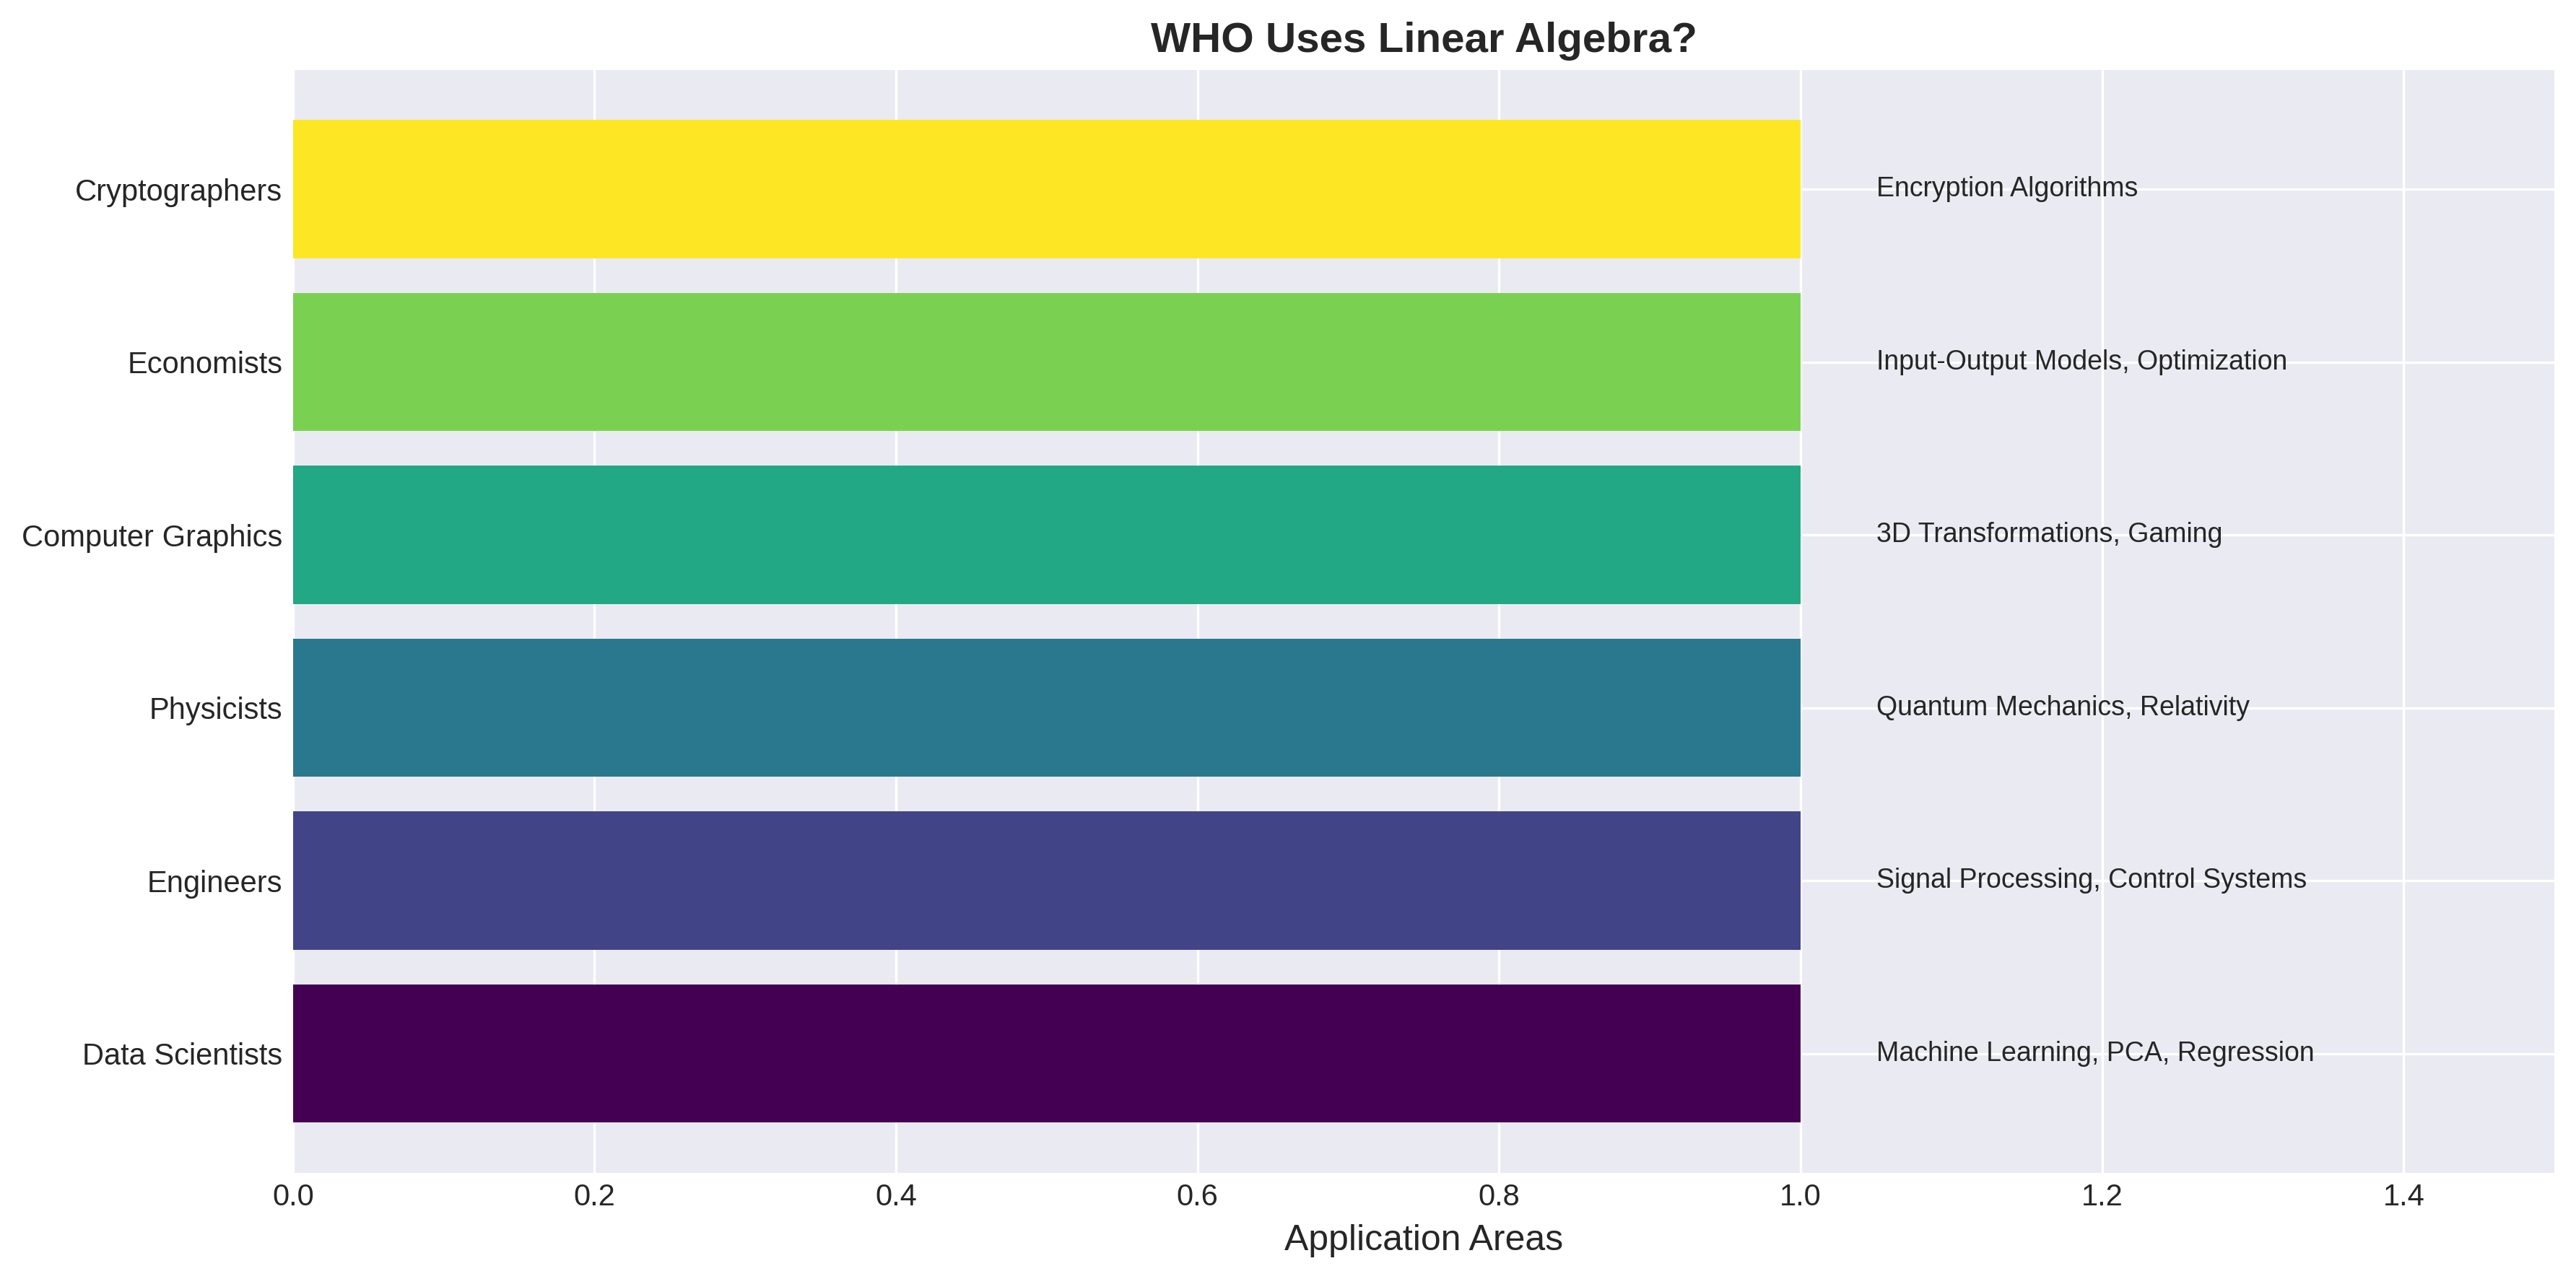


--- 02_what_is_linear_algebra.png ---


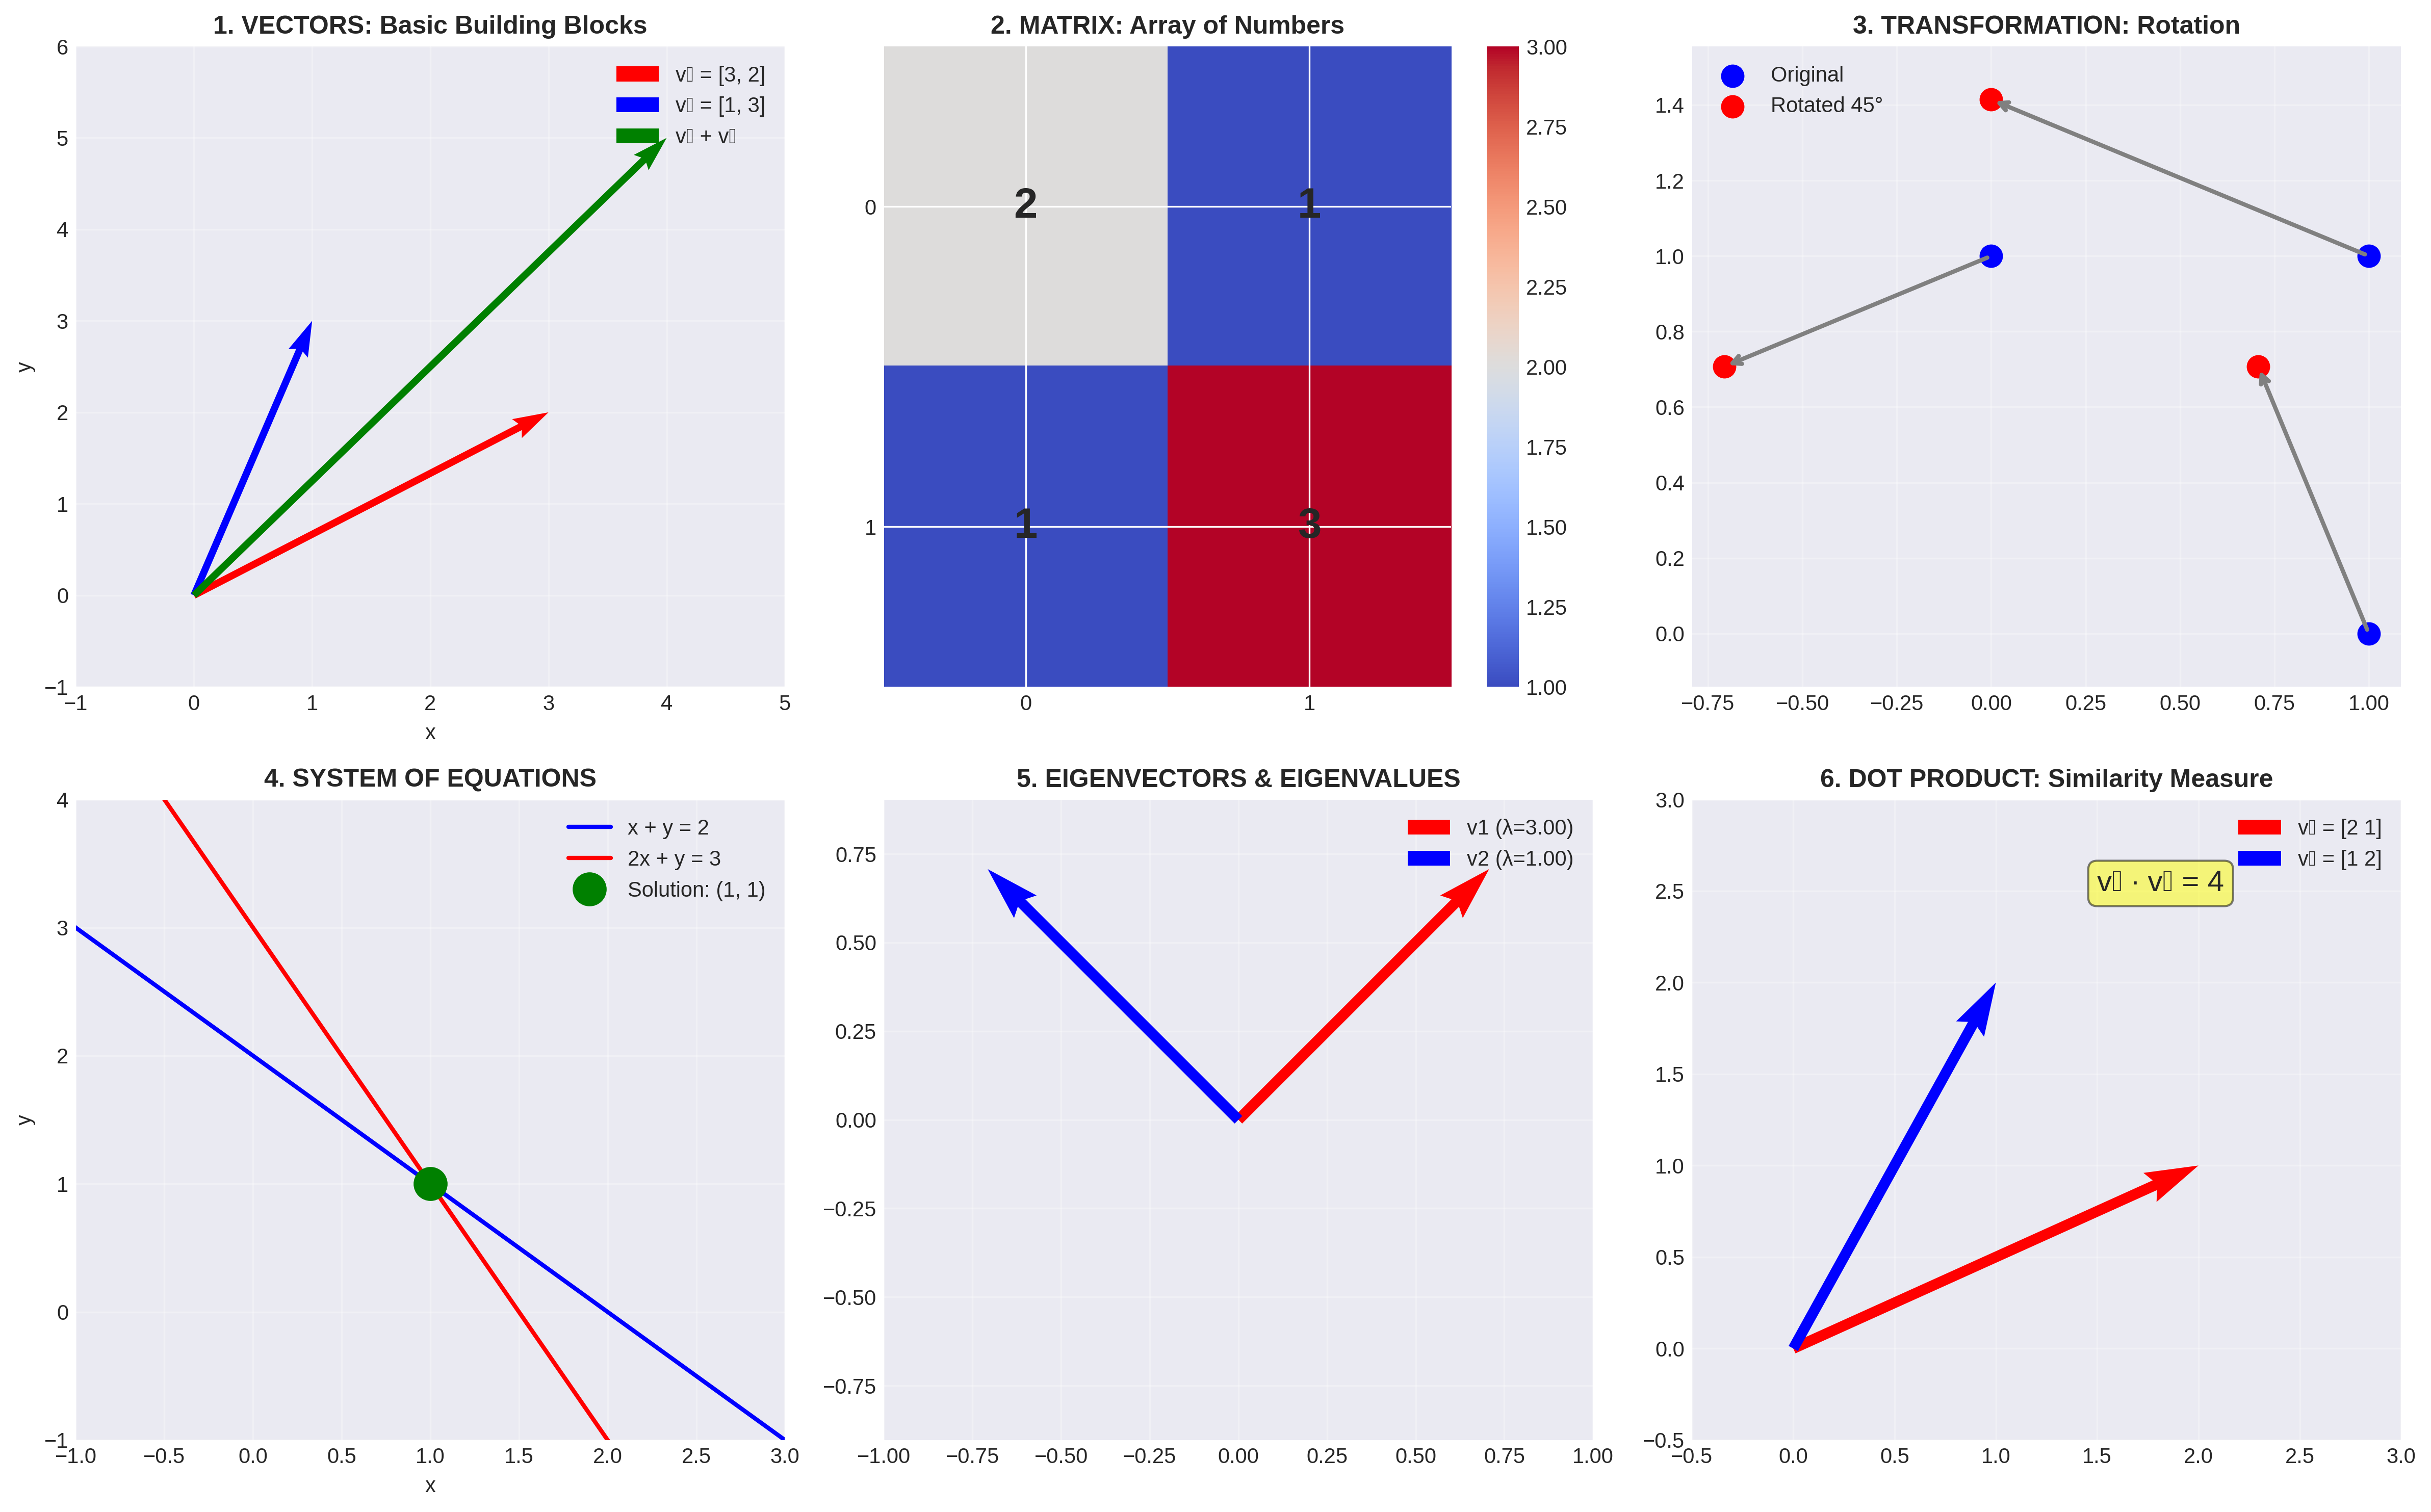


--- 03_when_is_linear_algebra_used.png ---


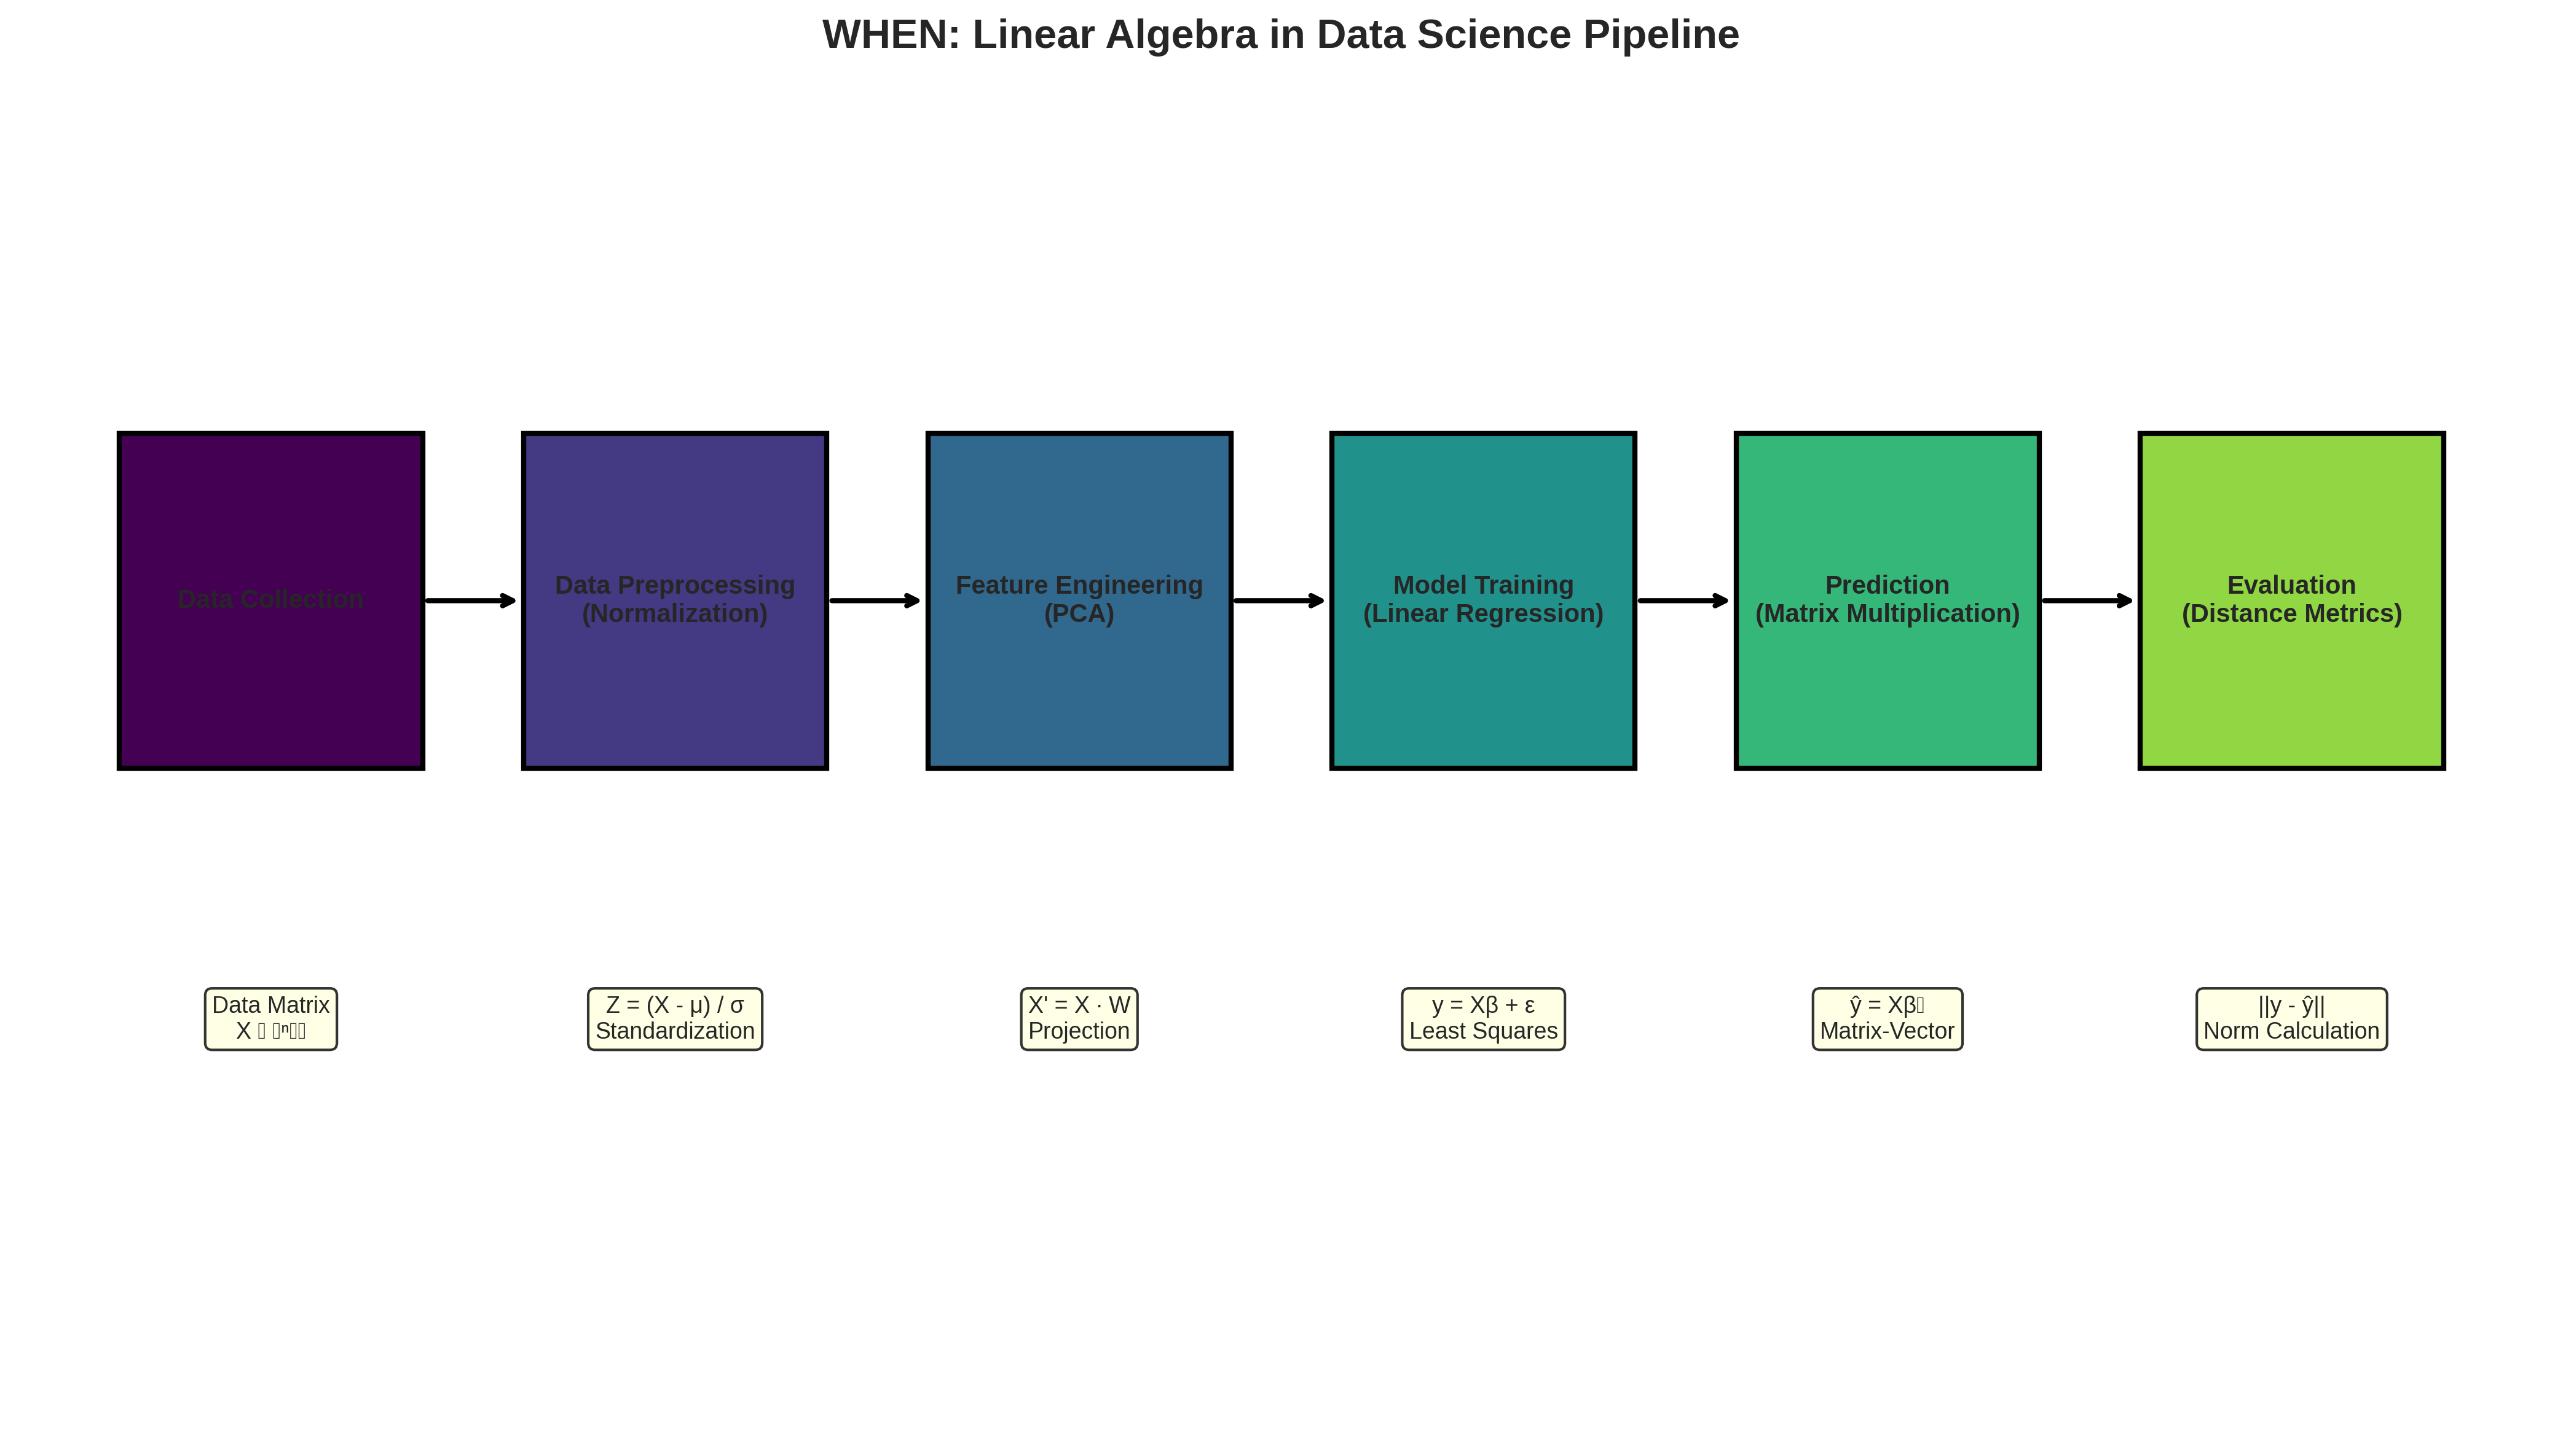


--- 04_where_is_linear_algebra_applied.png ---


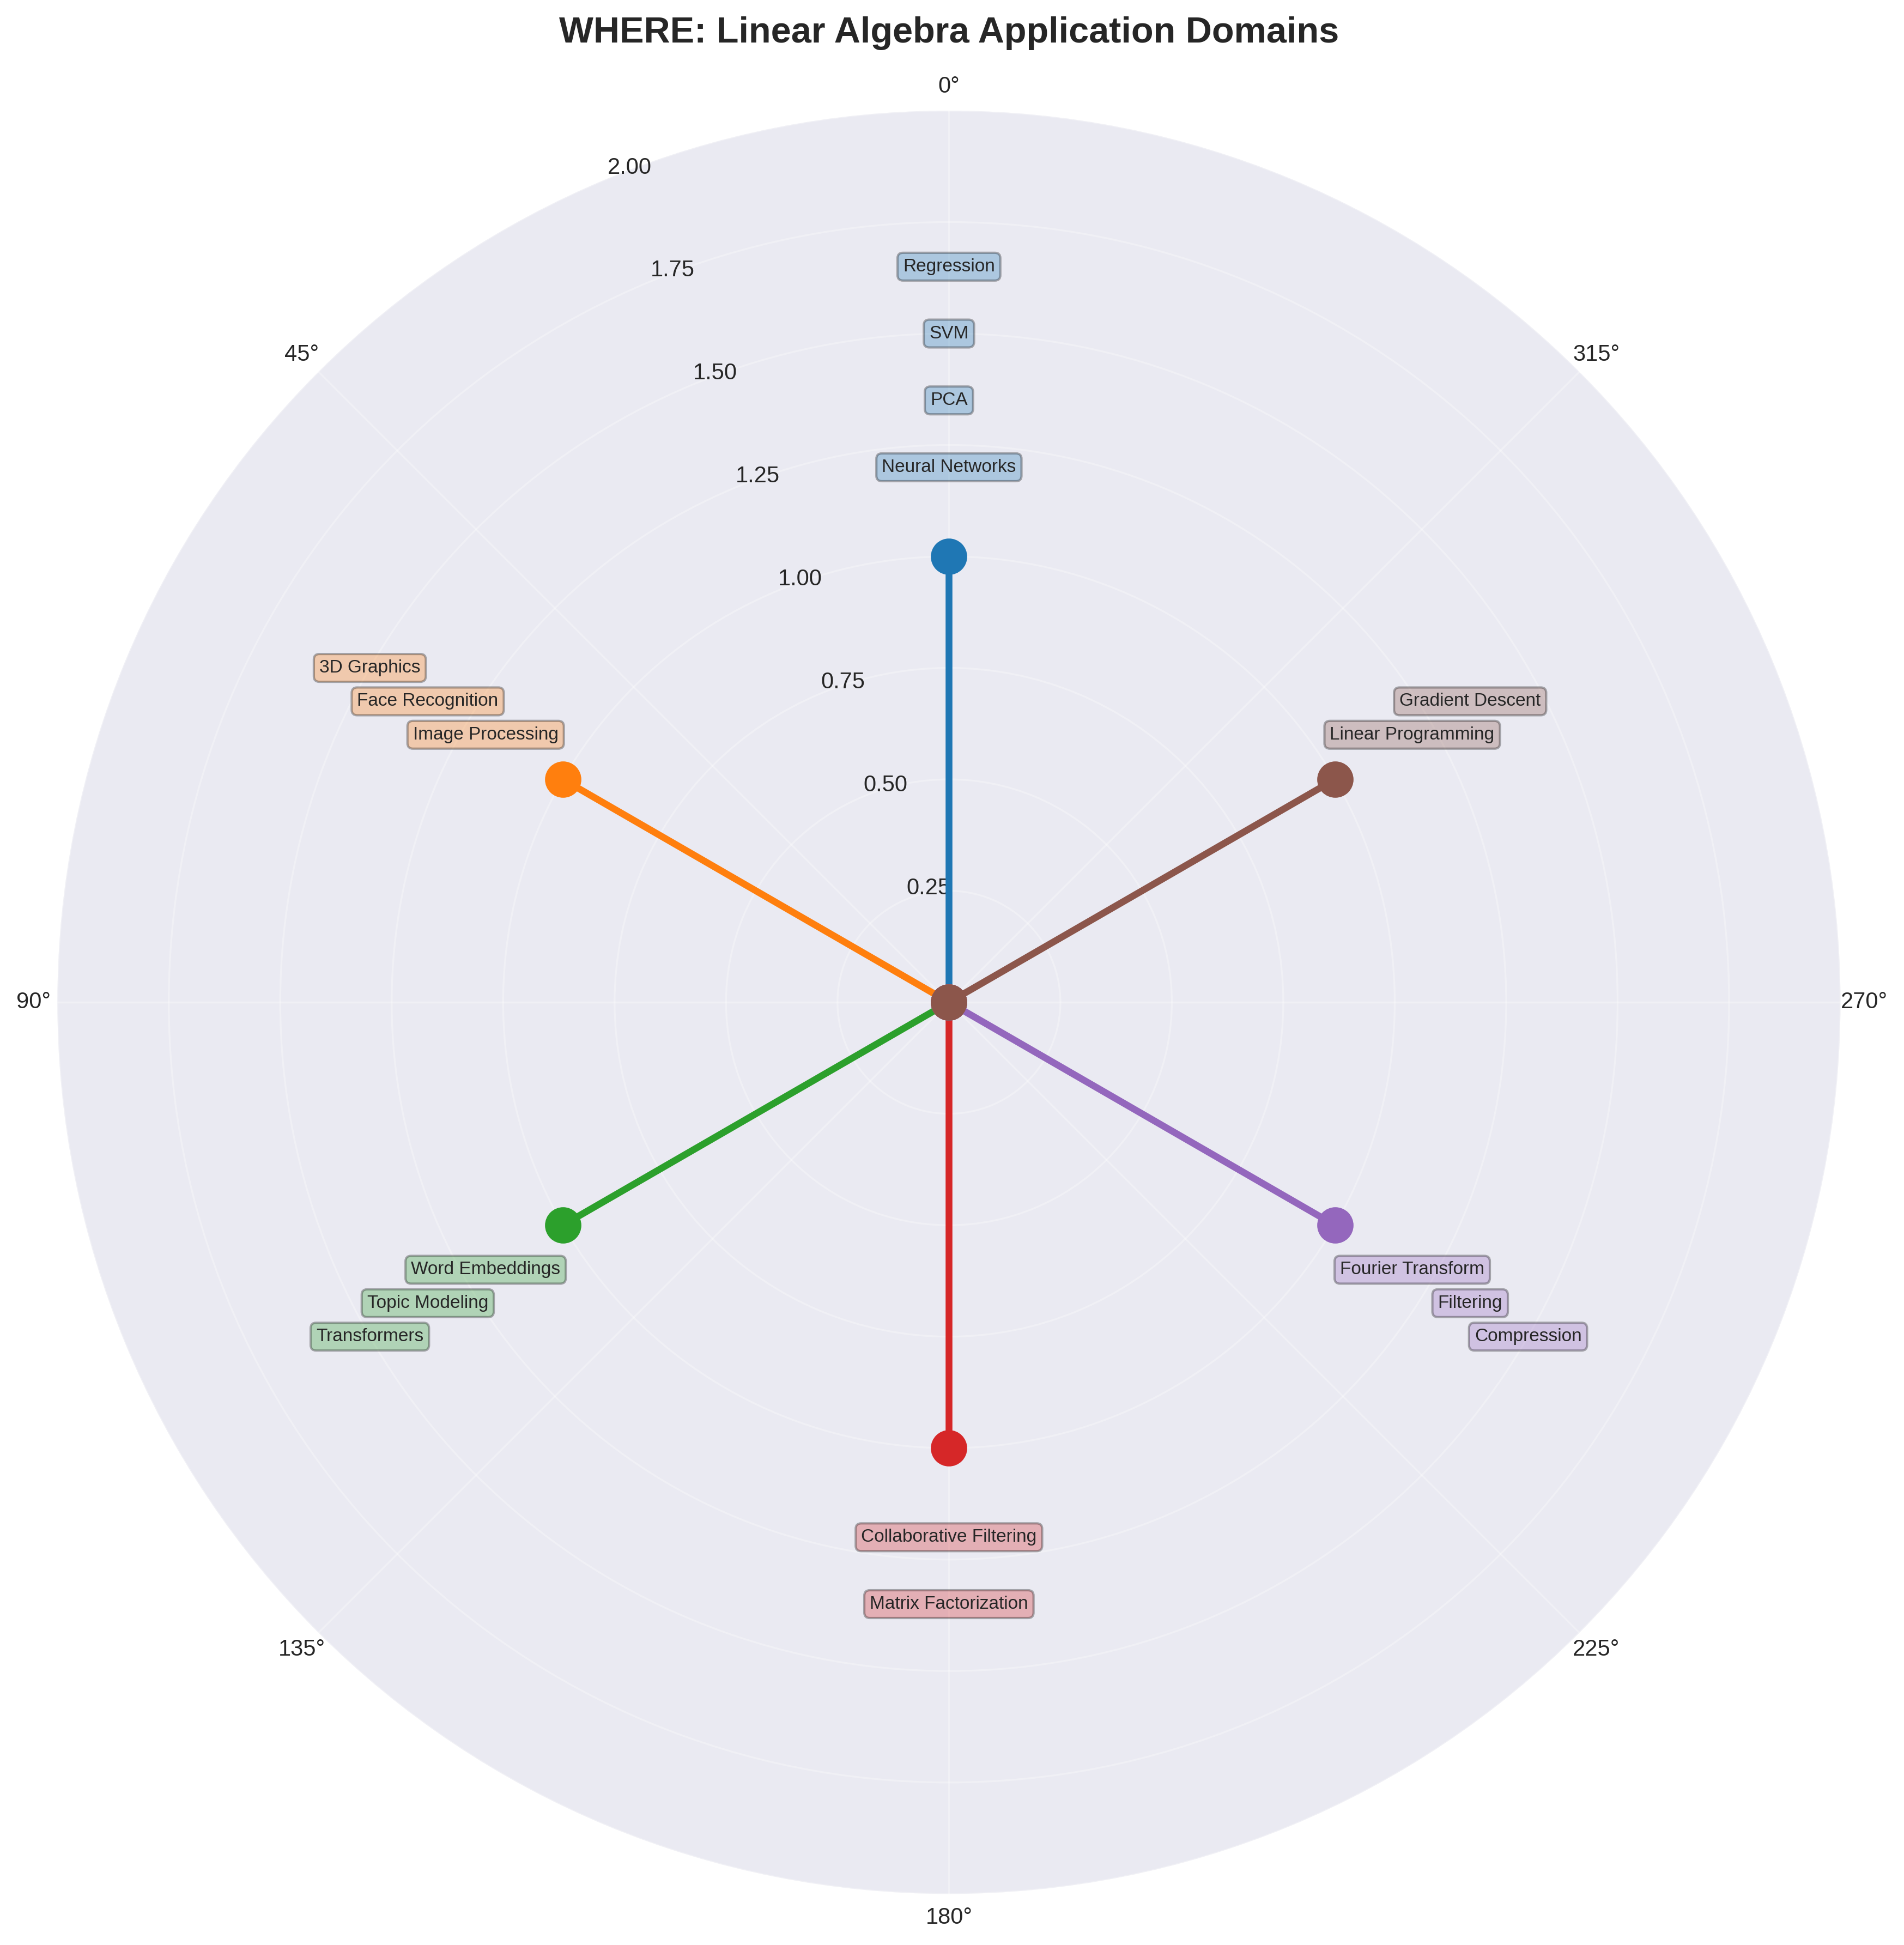


--- 05_why_is_linear_algebra_important.png ---


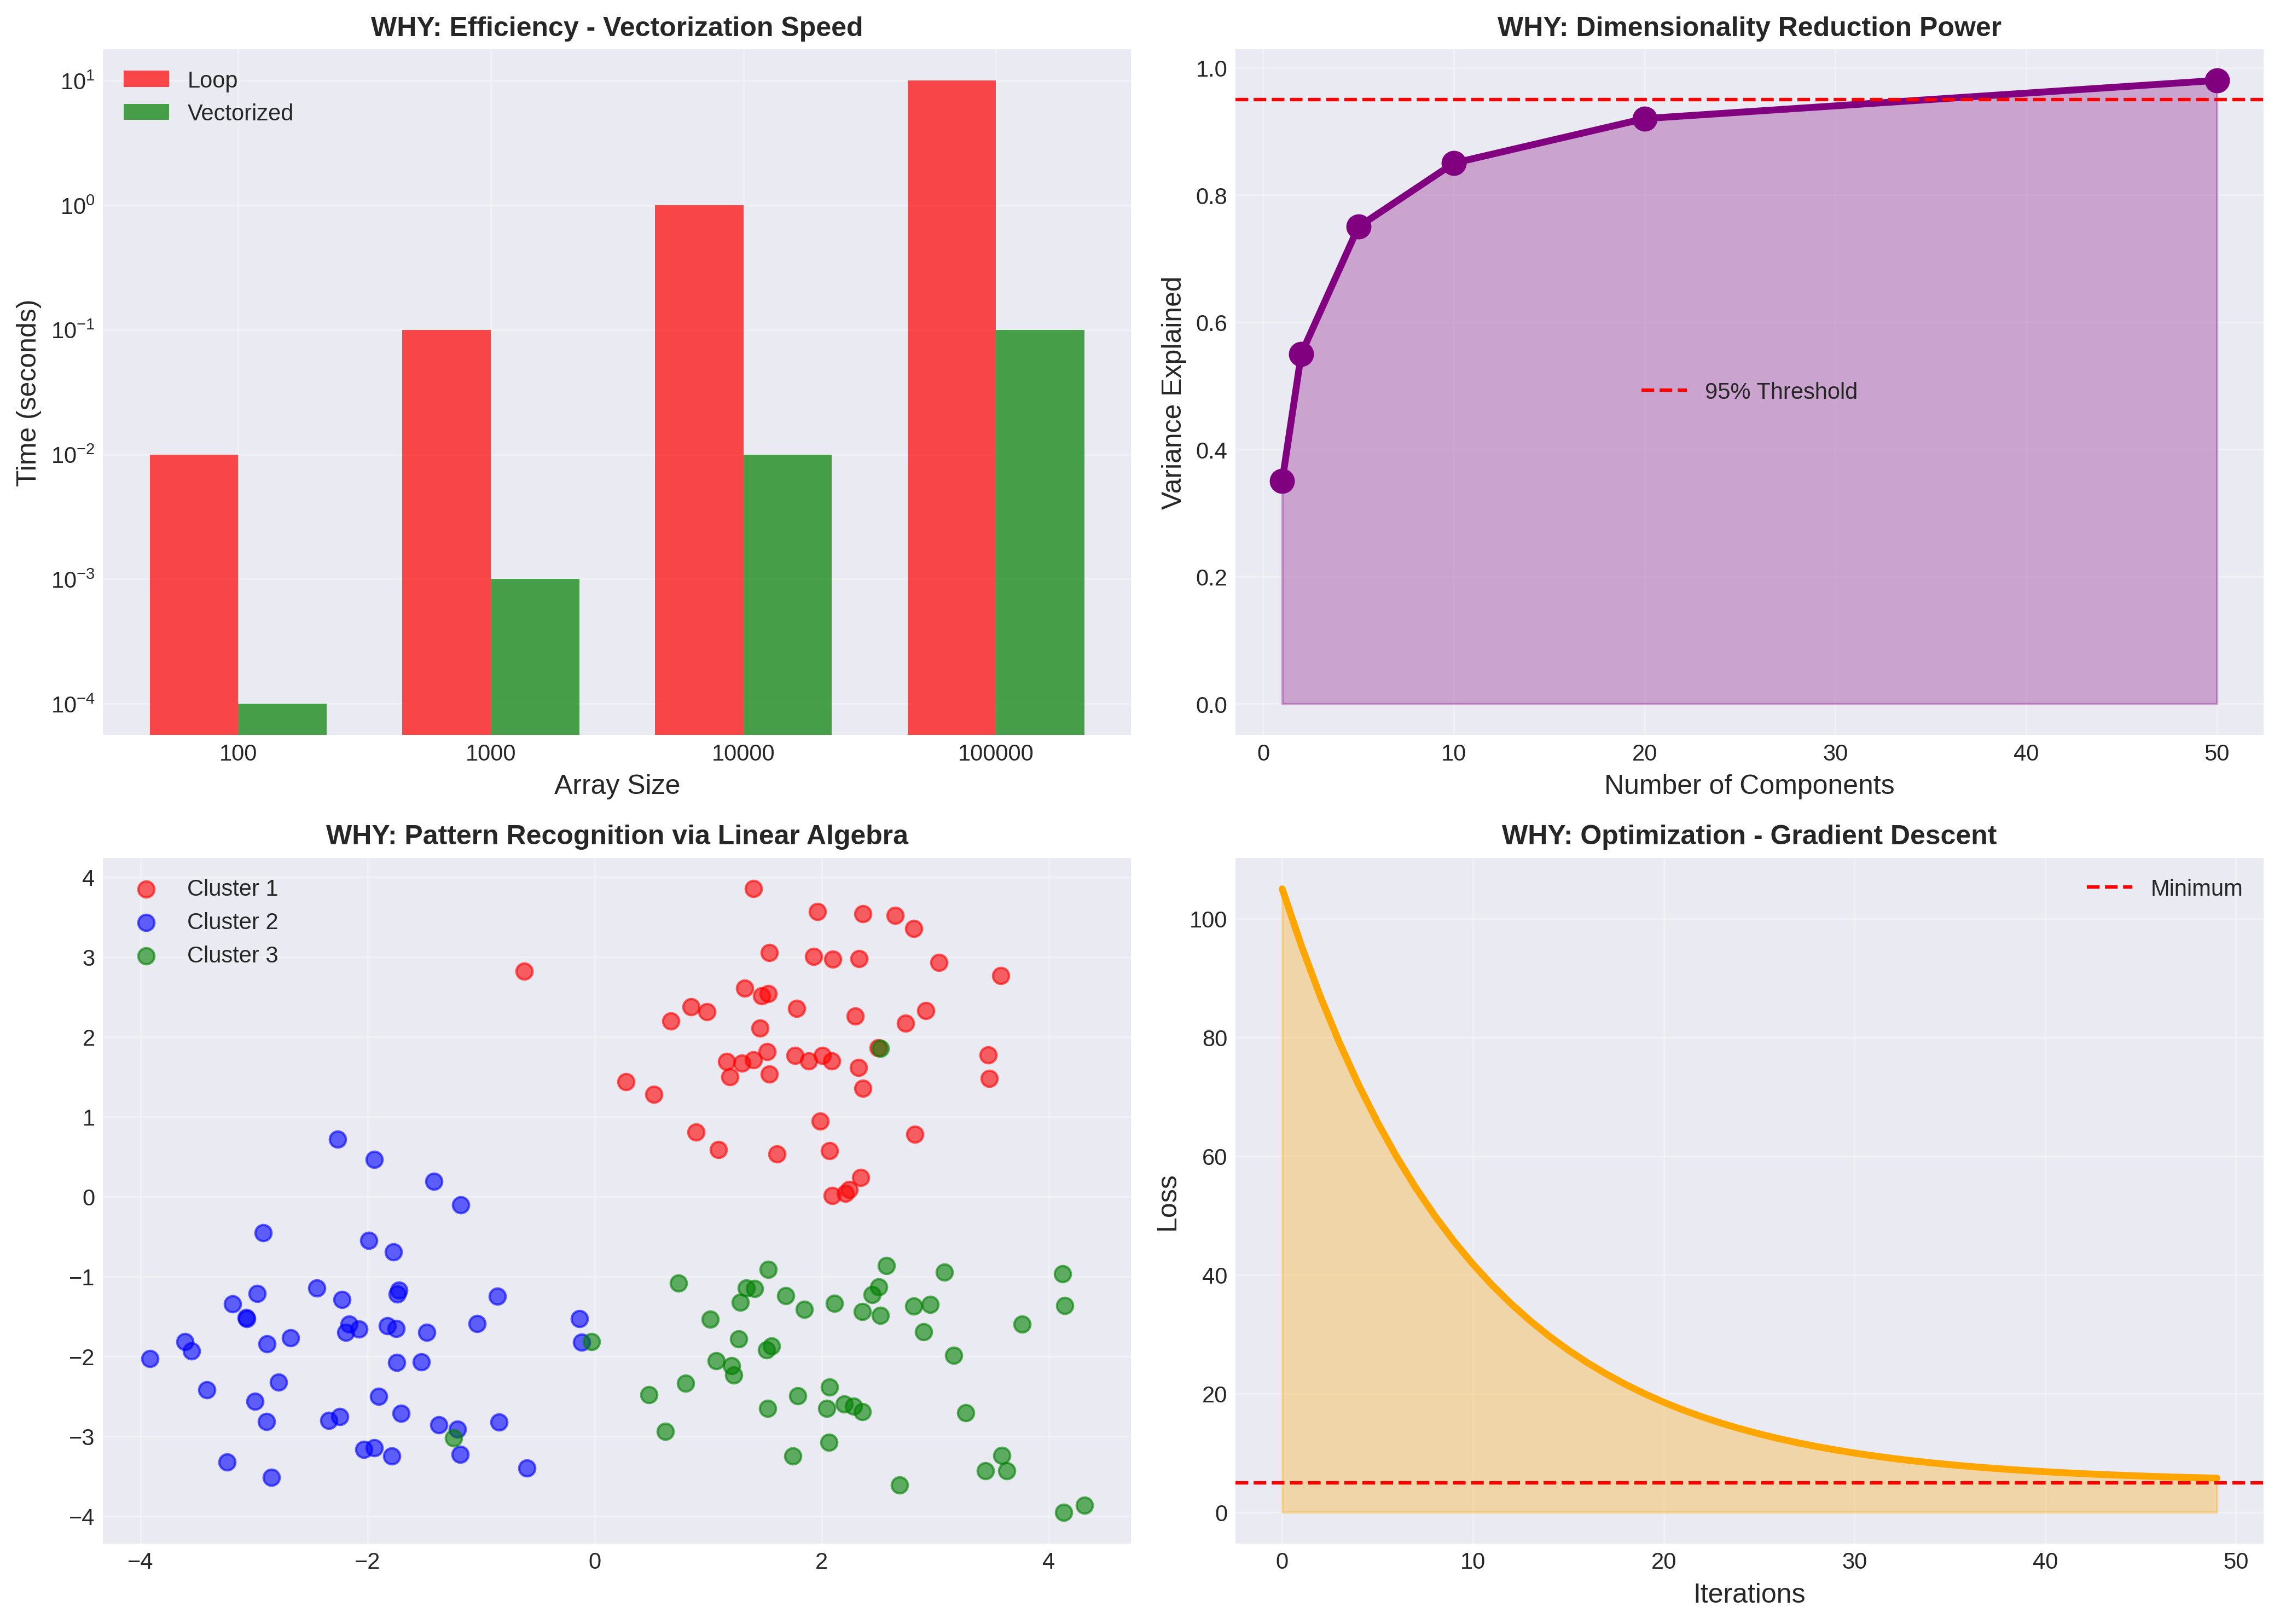


--- 06_step1_data_matrix.png ---


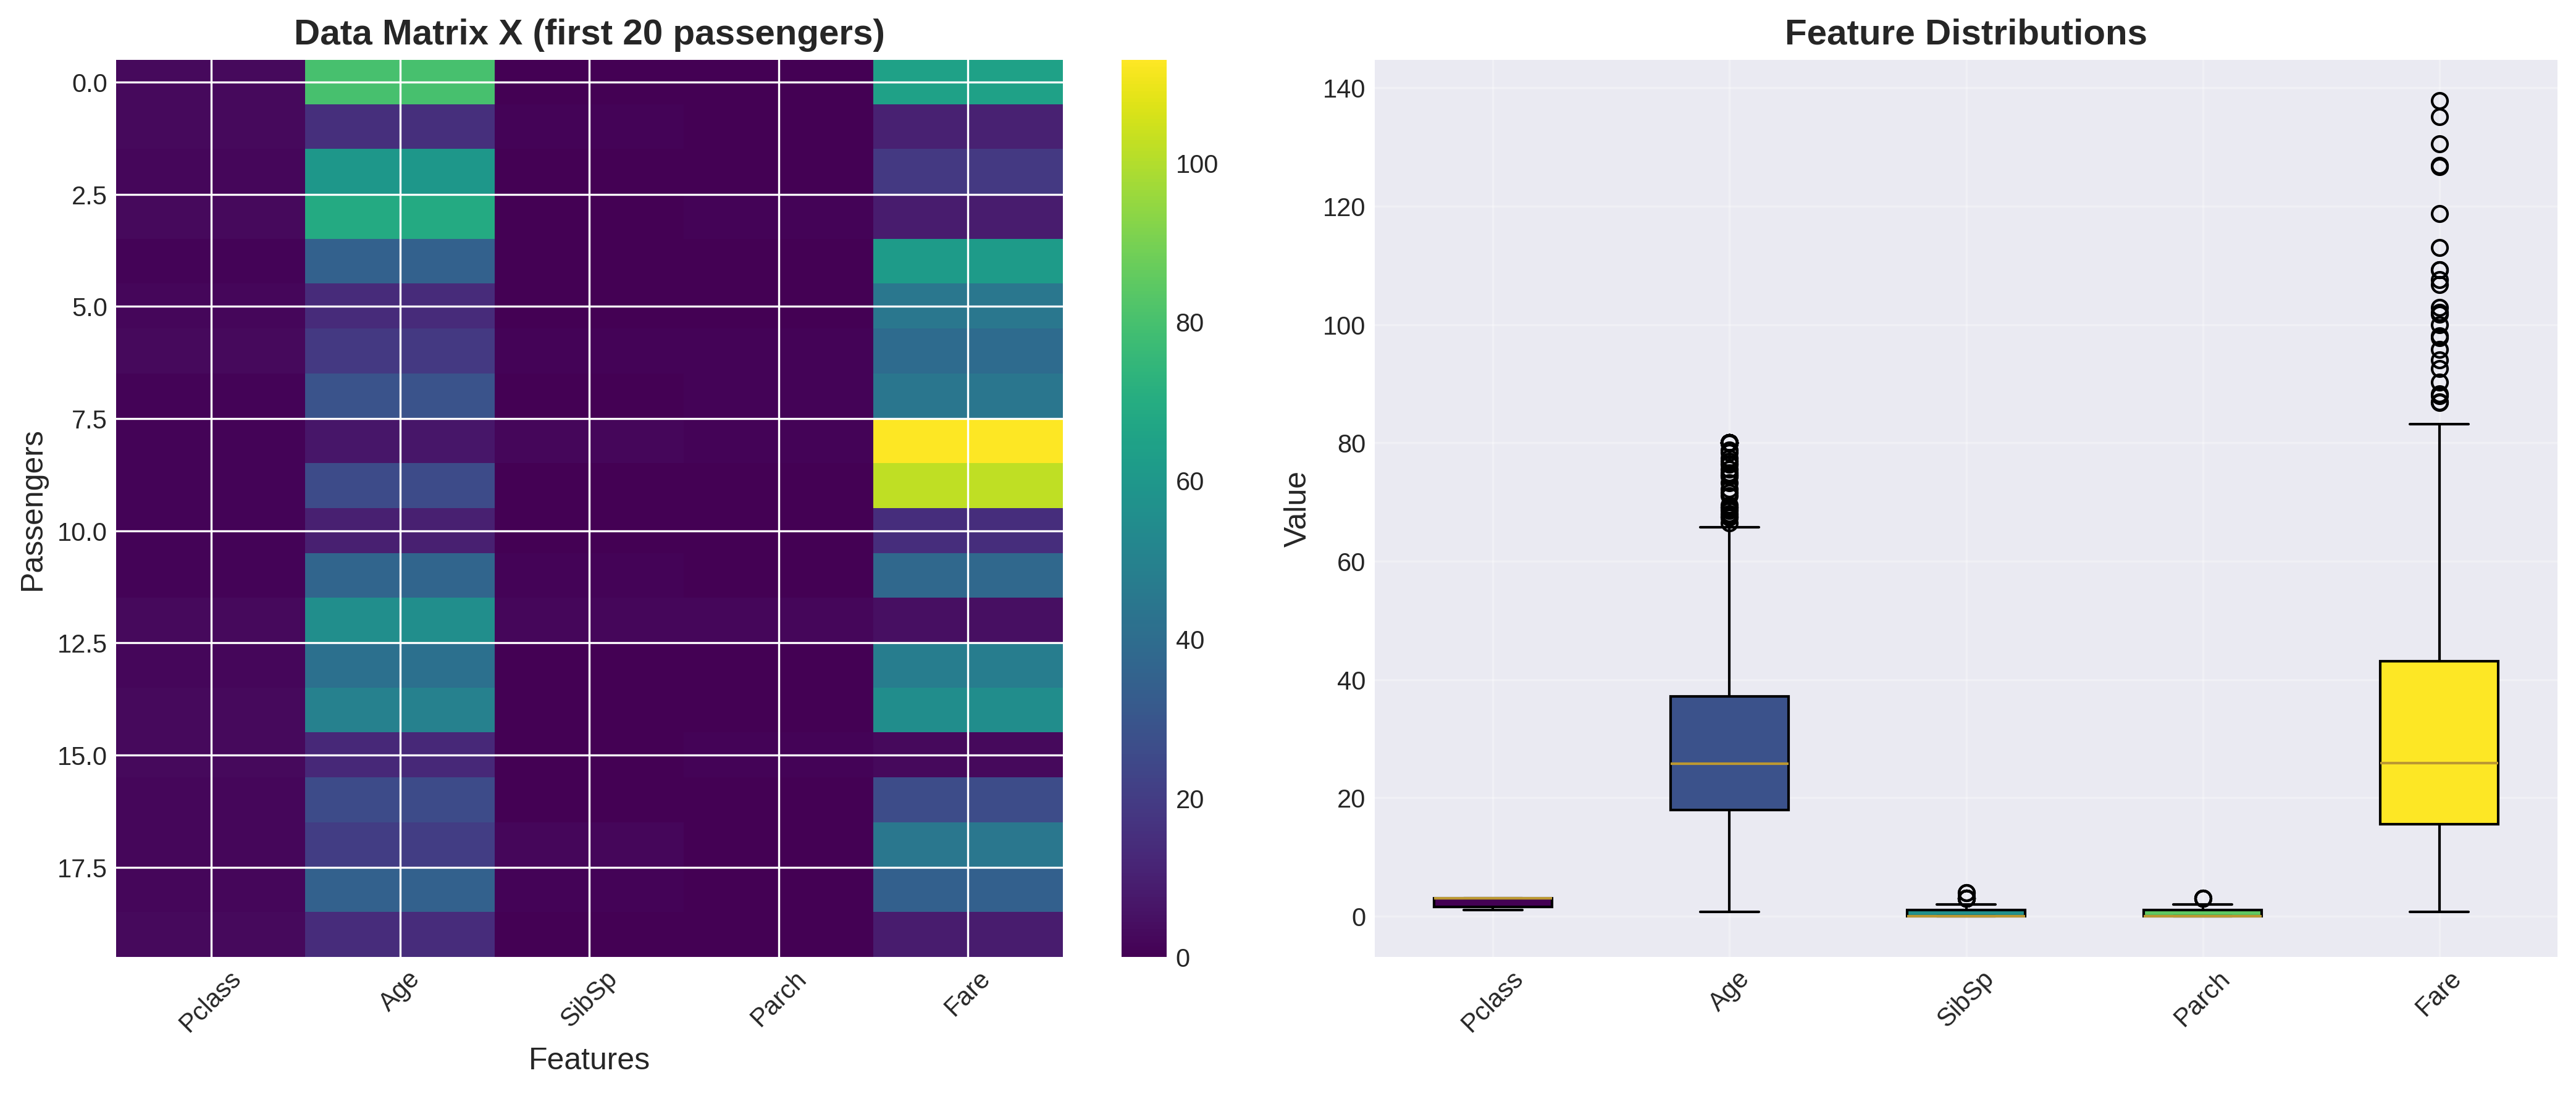


--- 07_step2_normalization.png ---


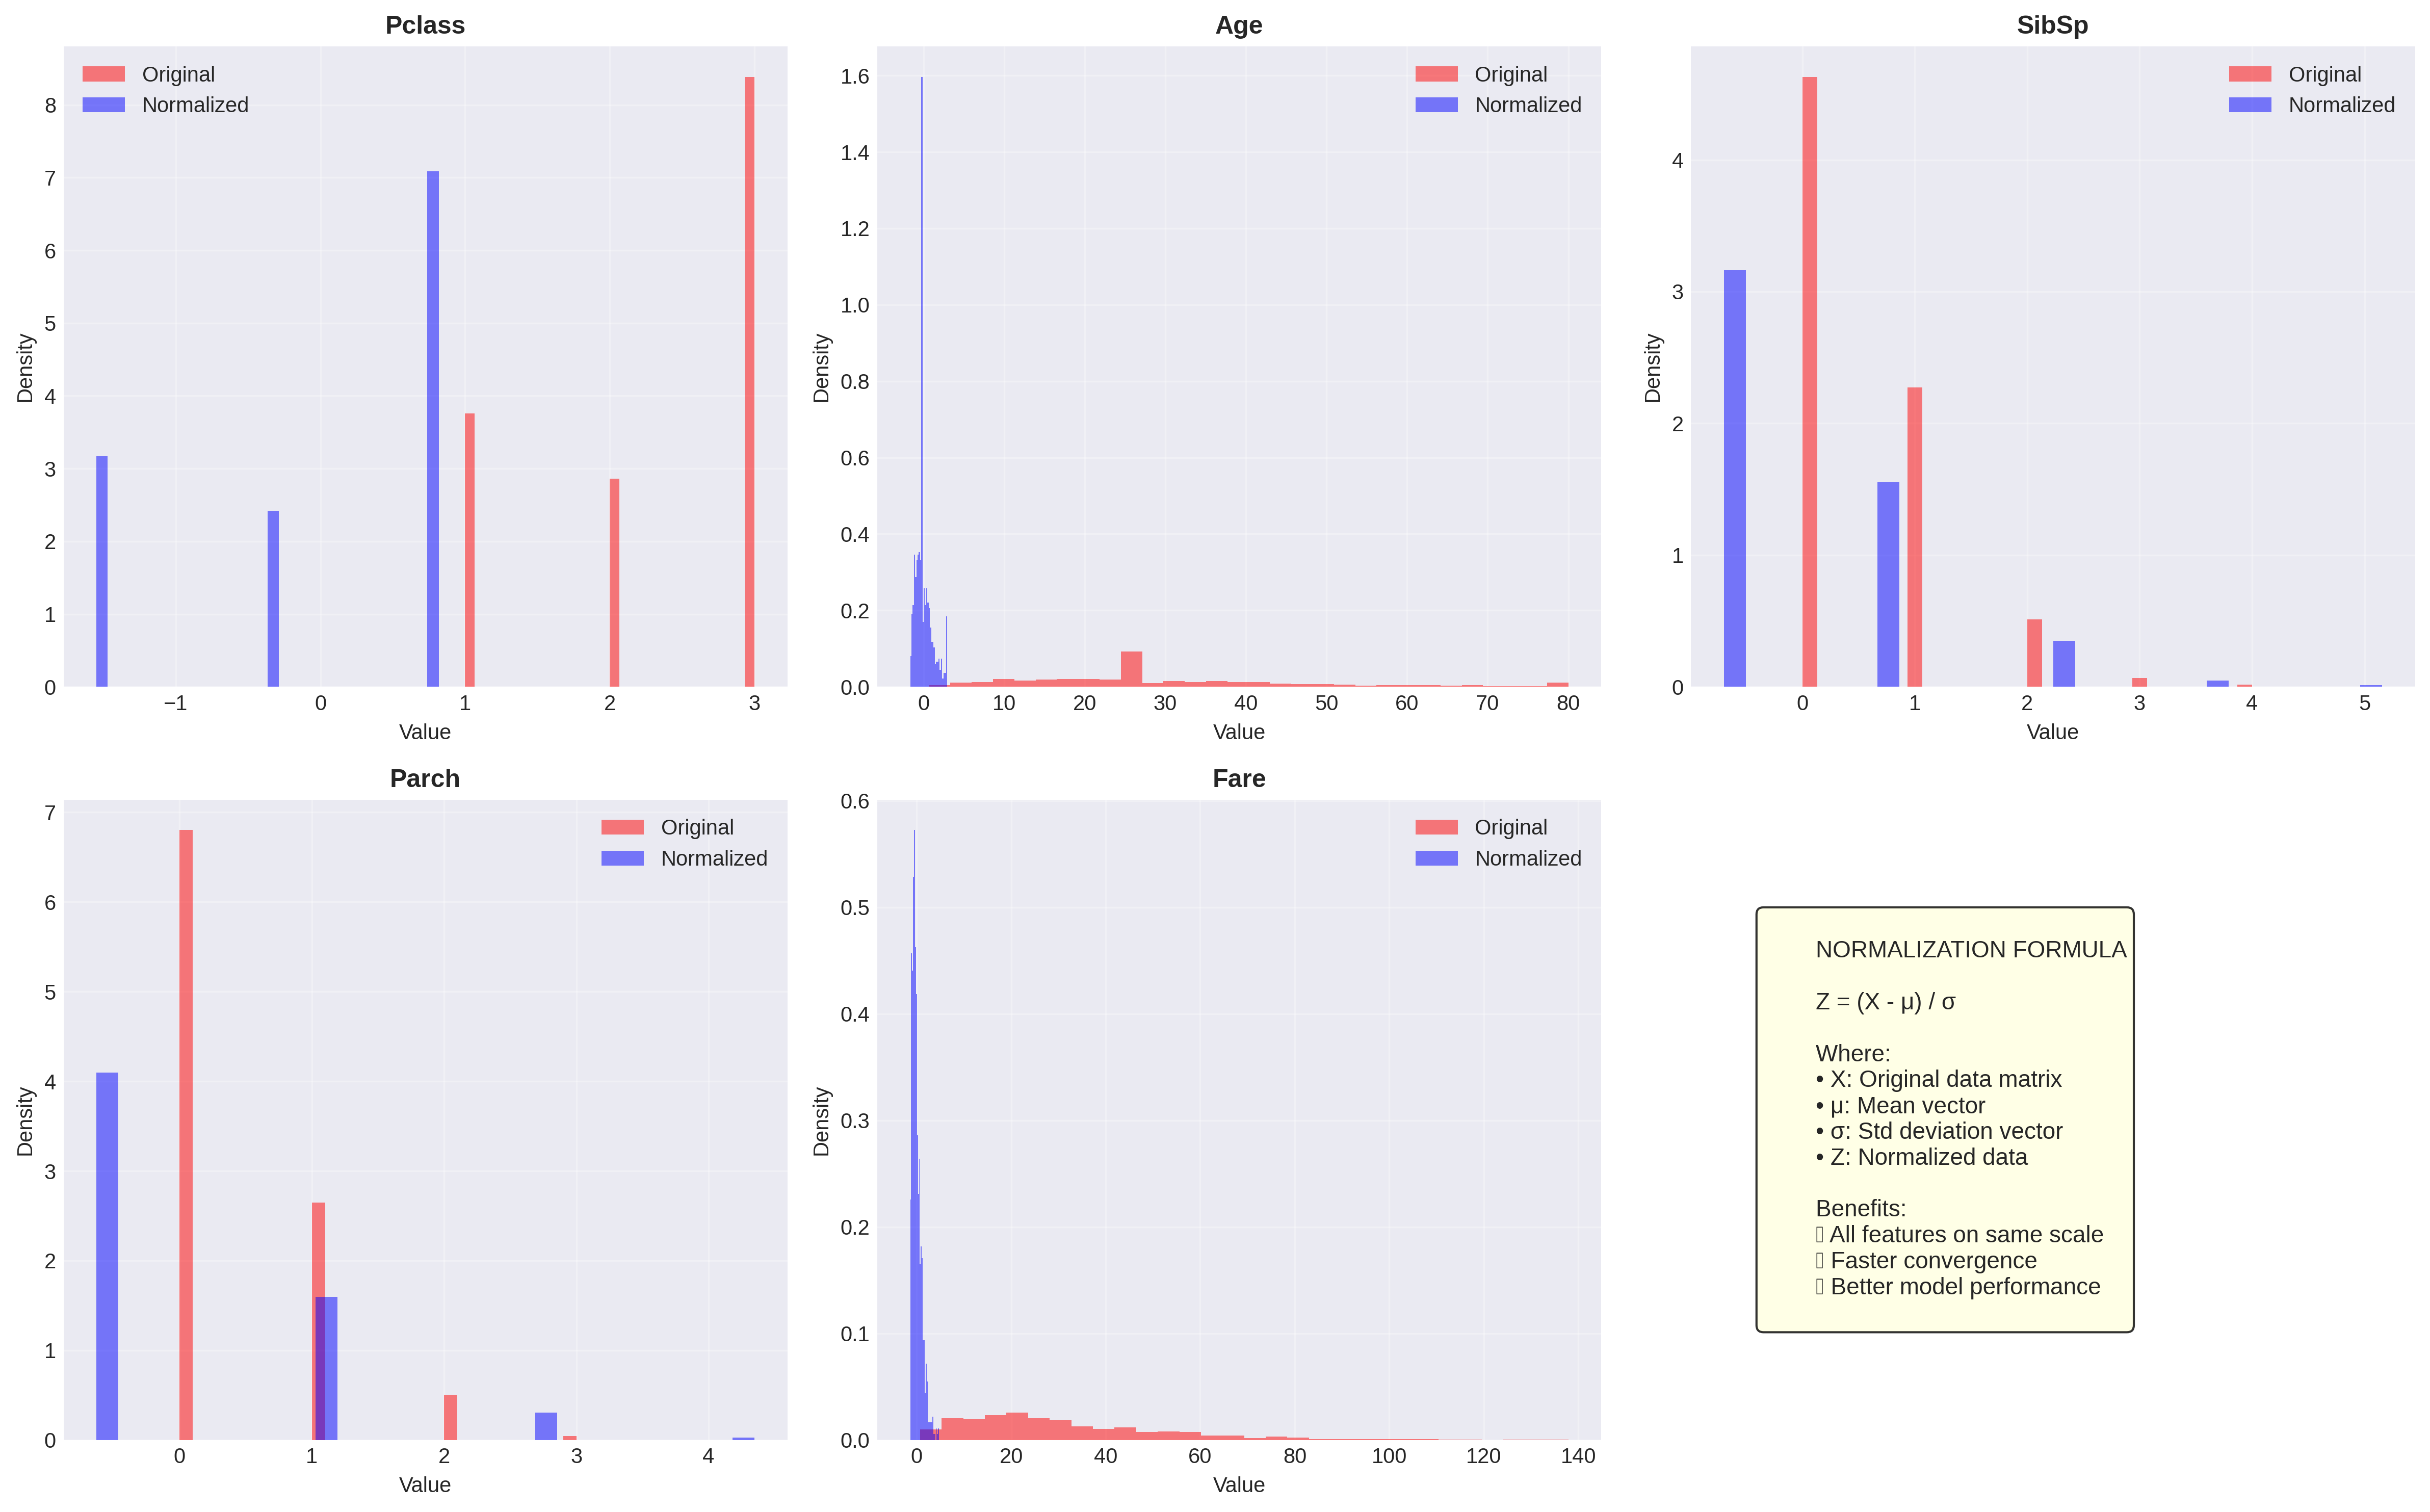


--- 08_step3_pca.png ---


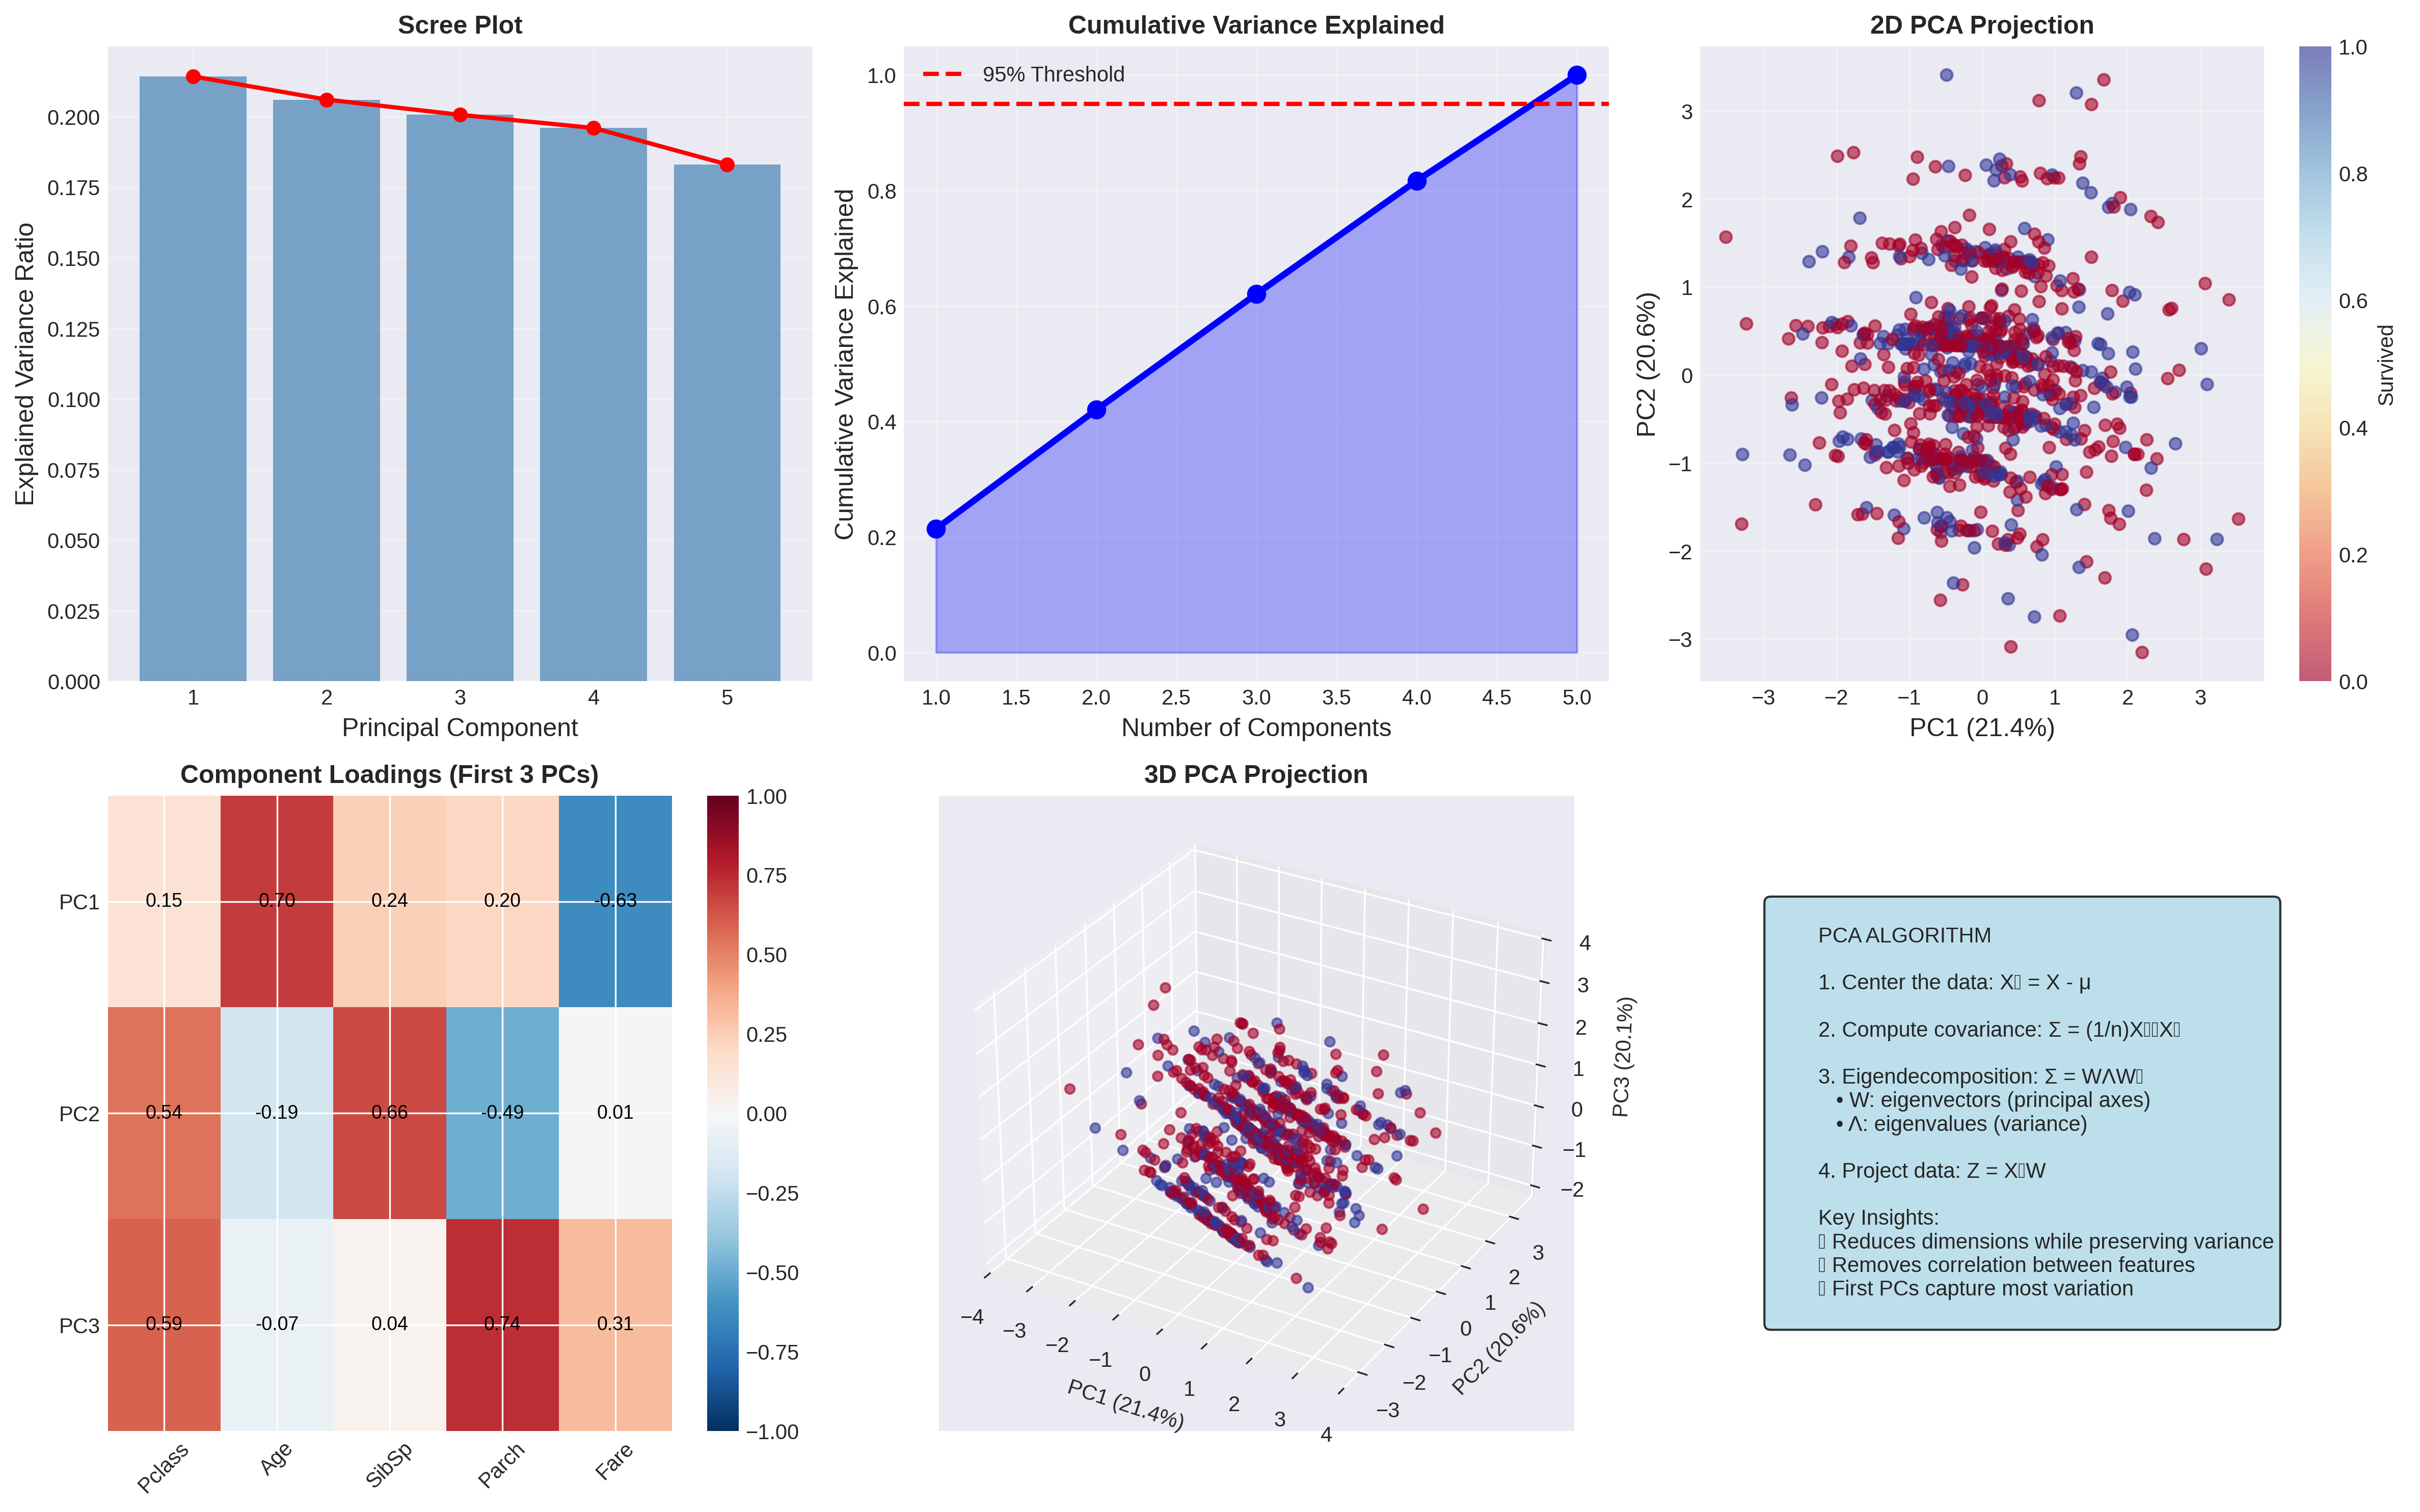


--- 09_step4_regression.png ---


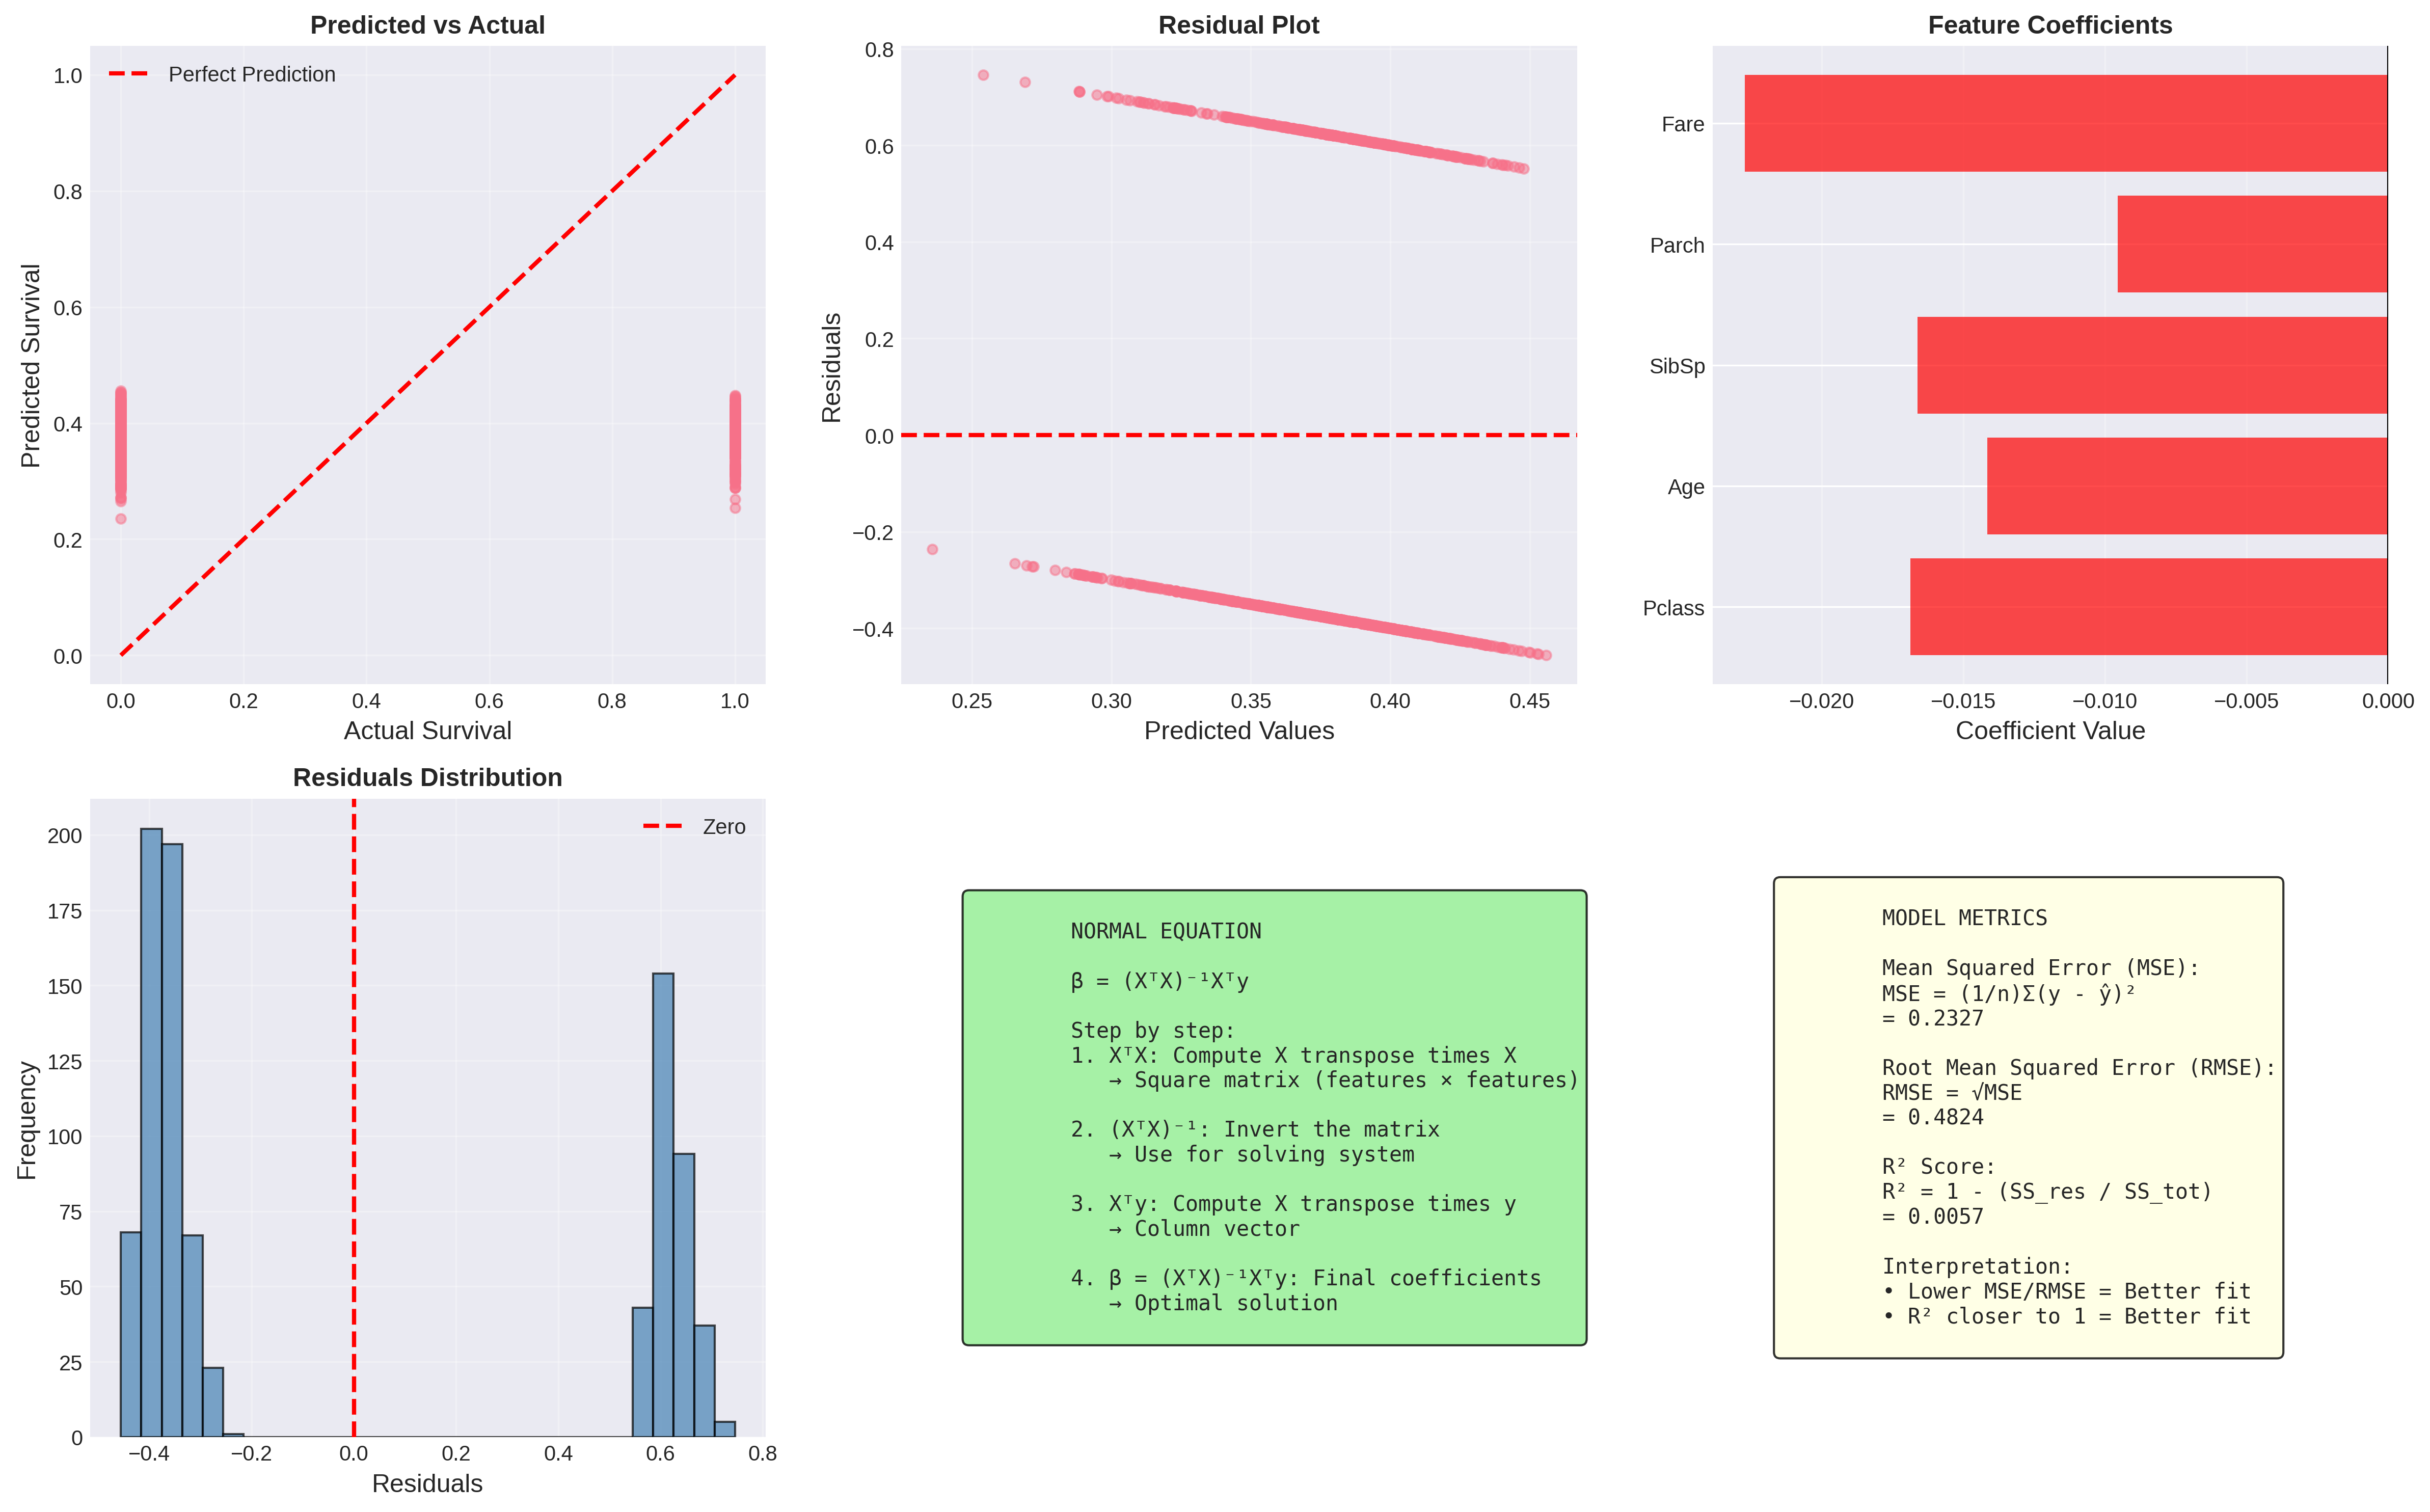


--- 10_step5_distance_metrics.png ---


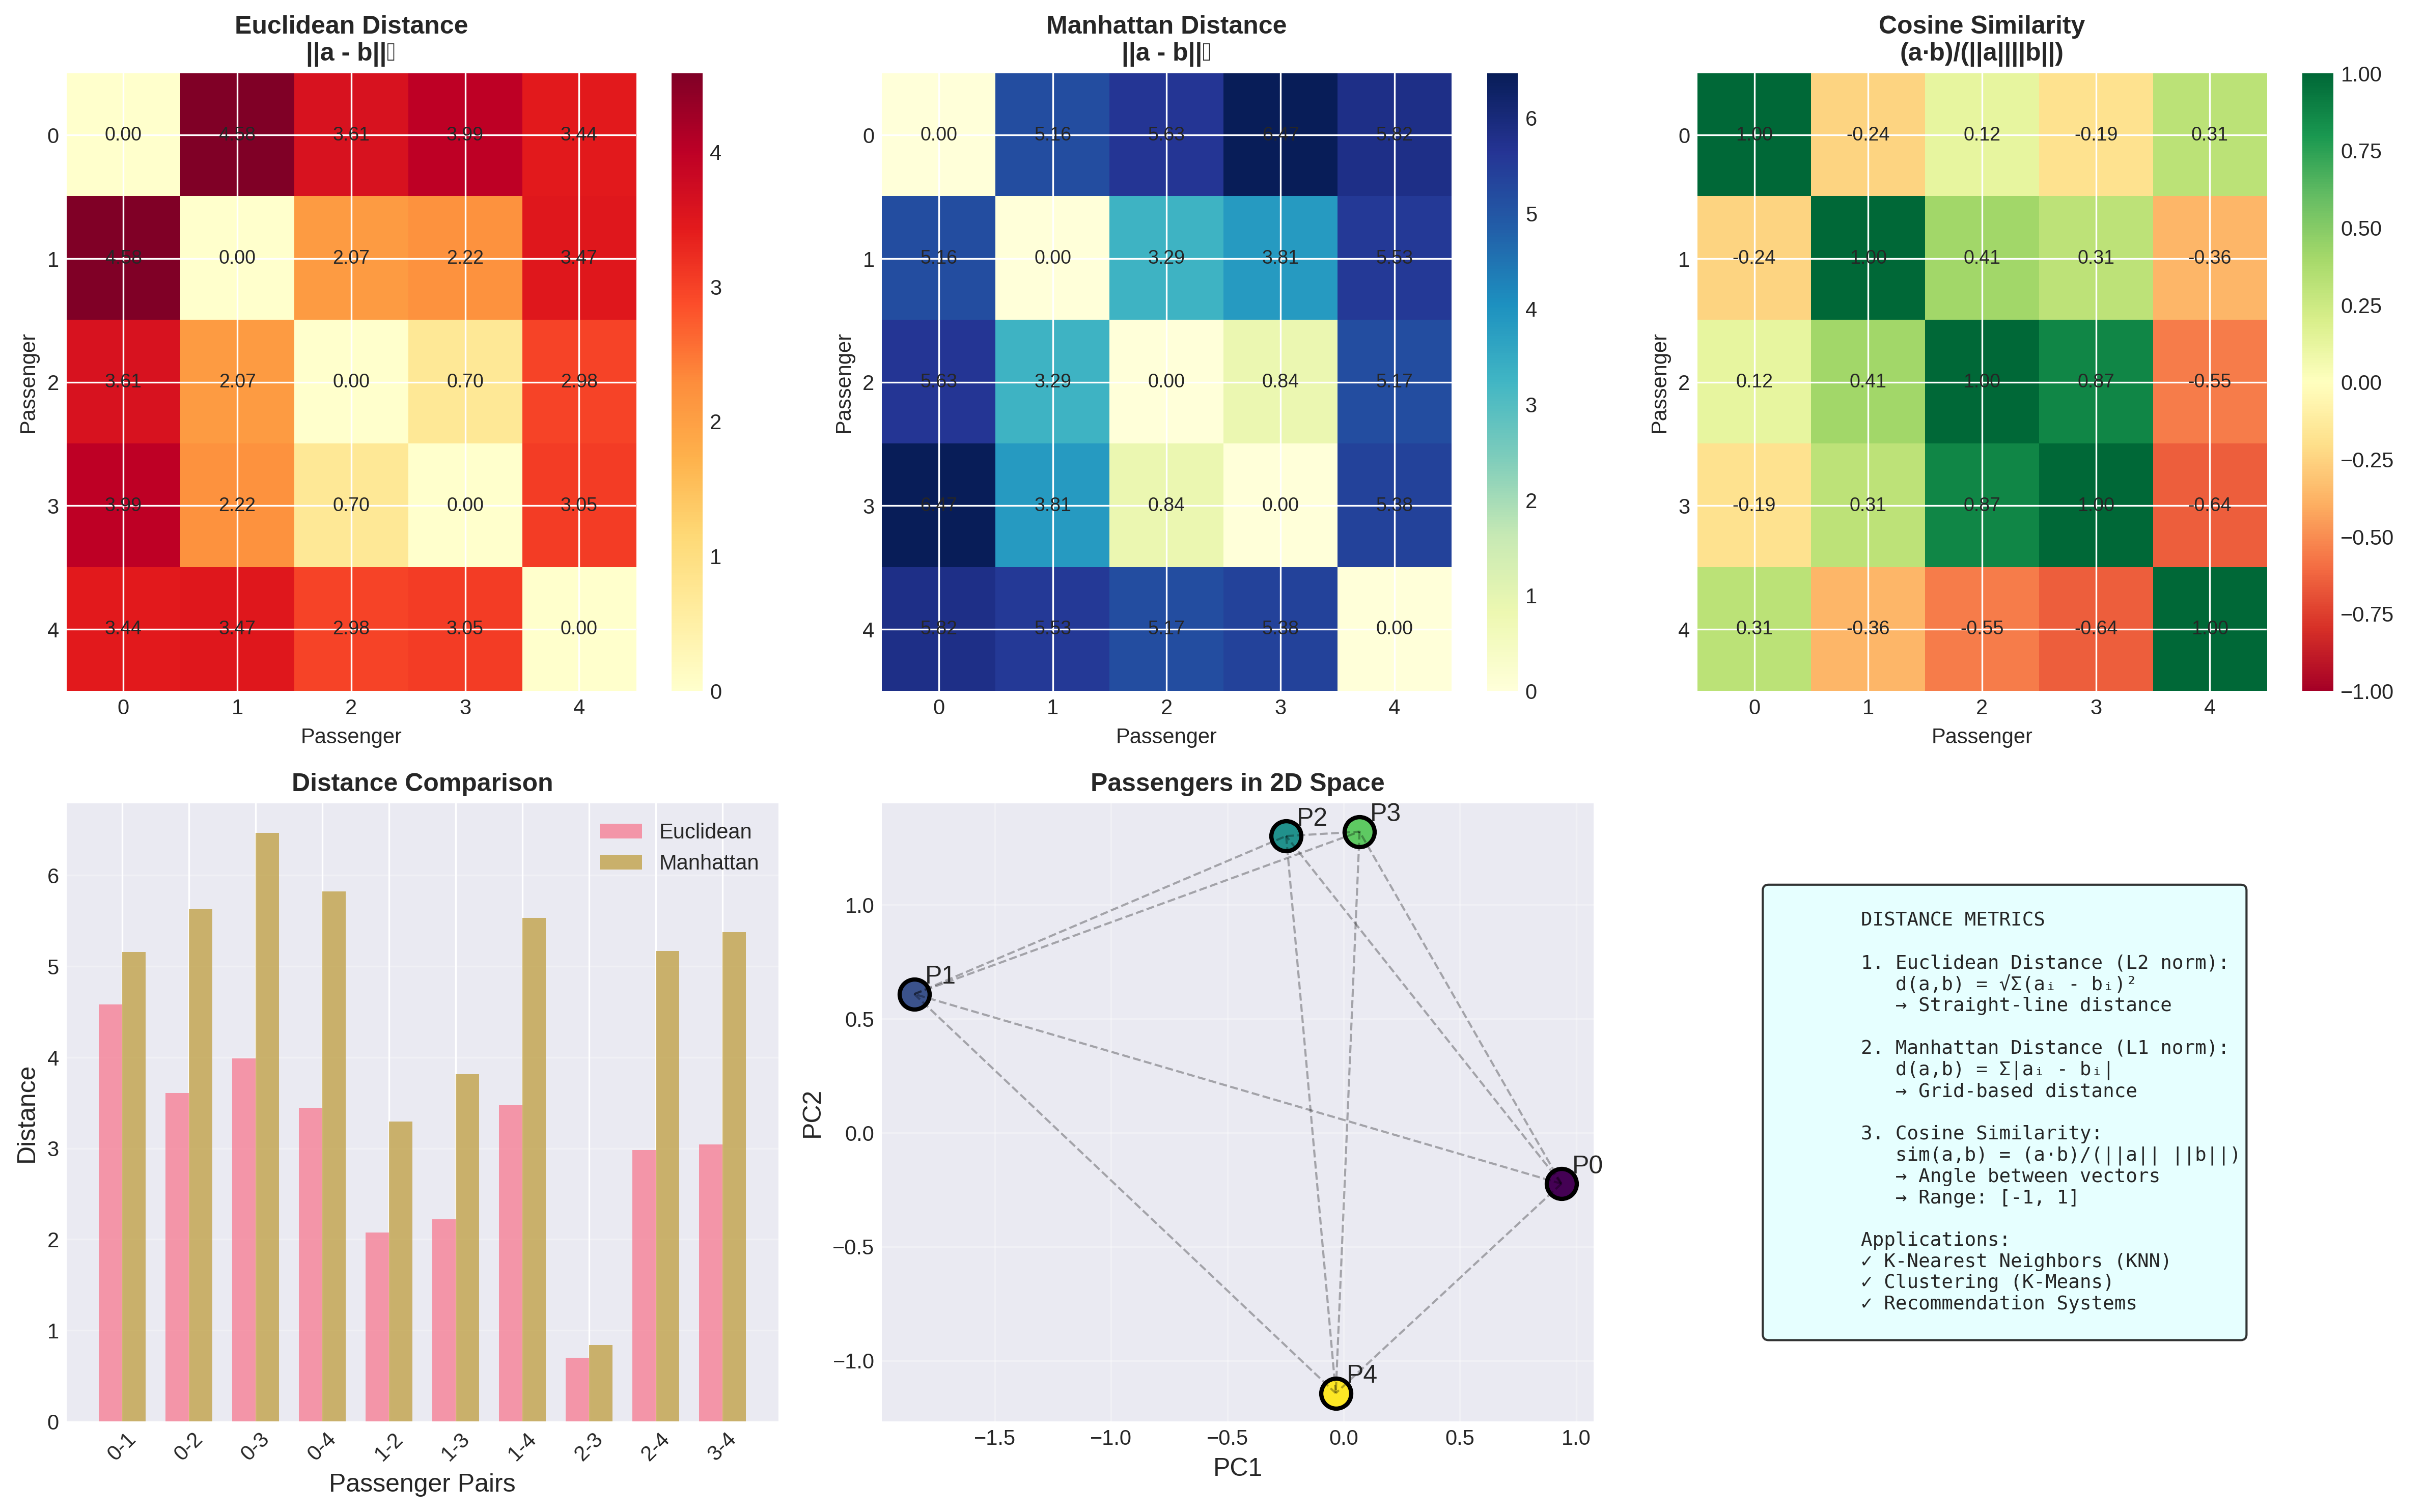


--- 11_complete_summary.png ---


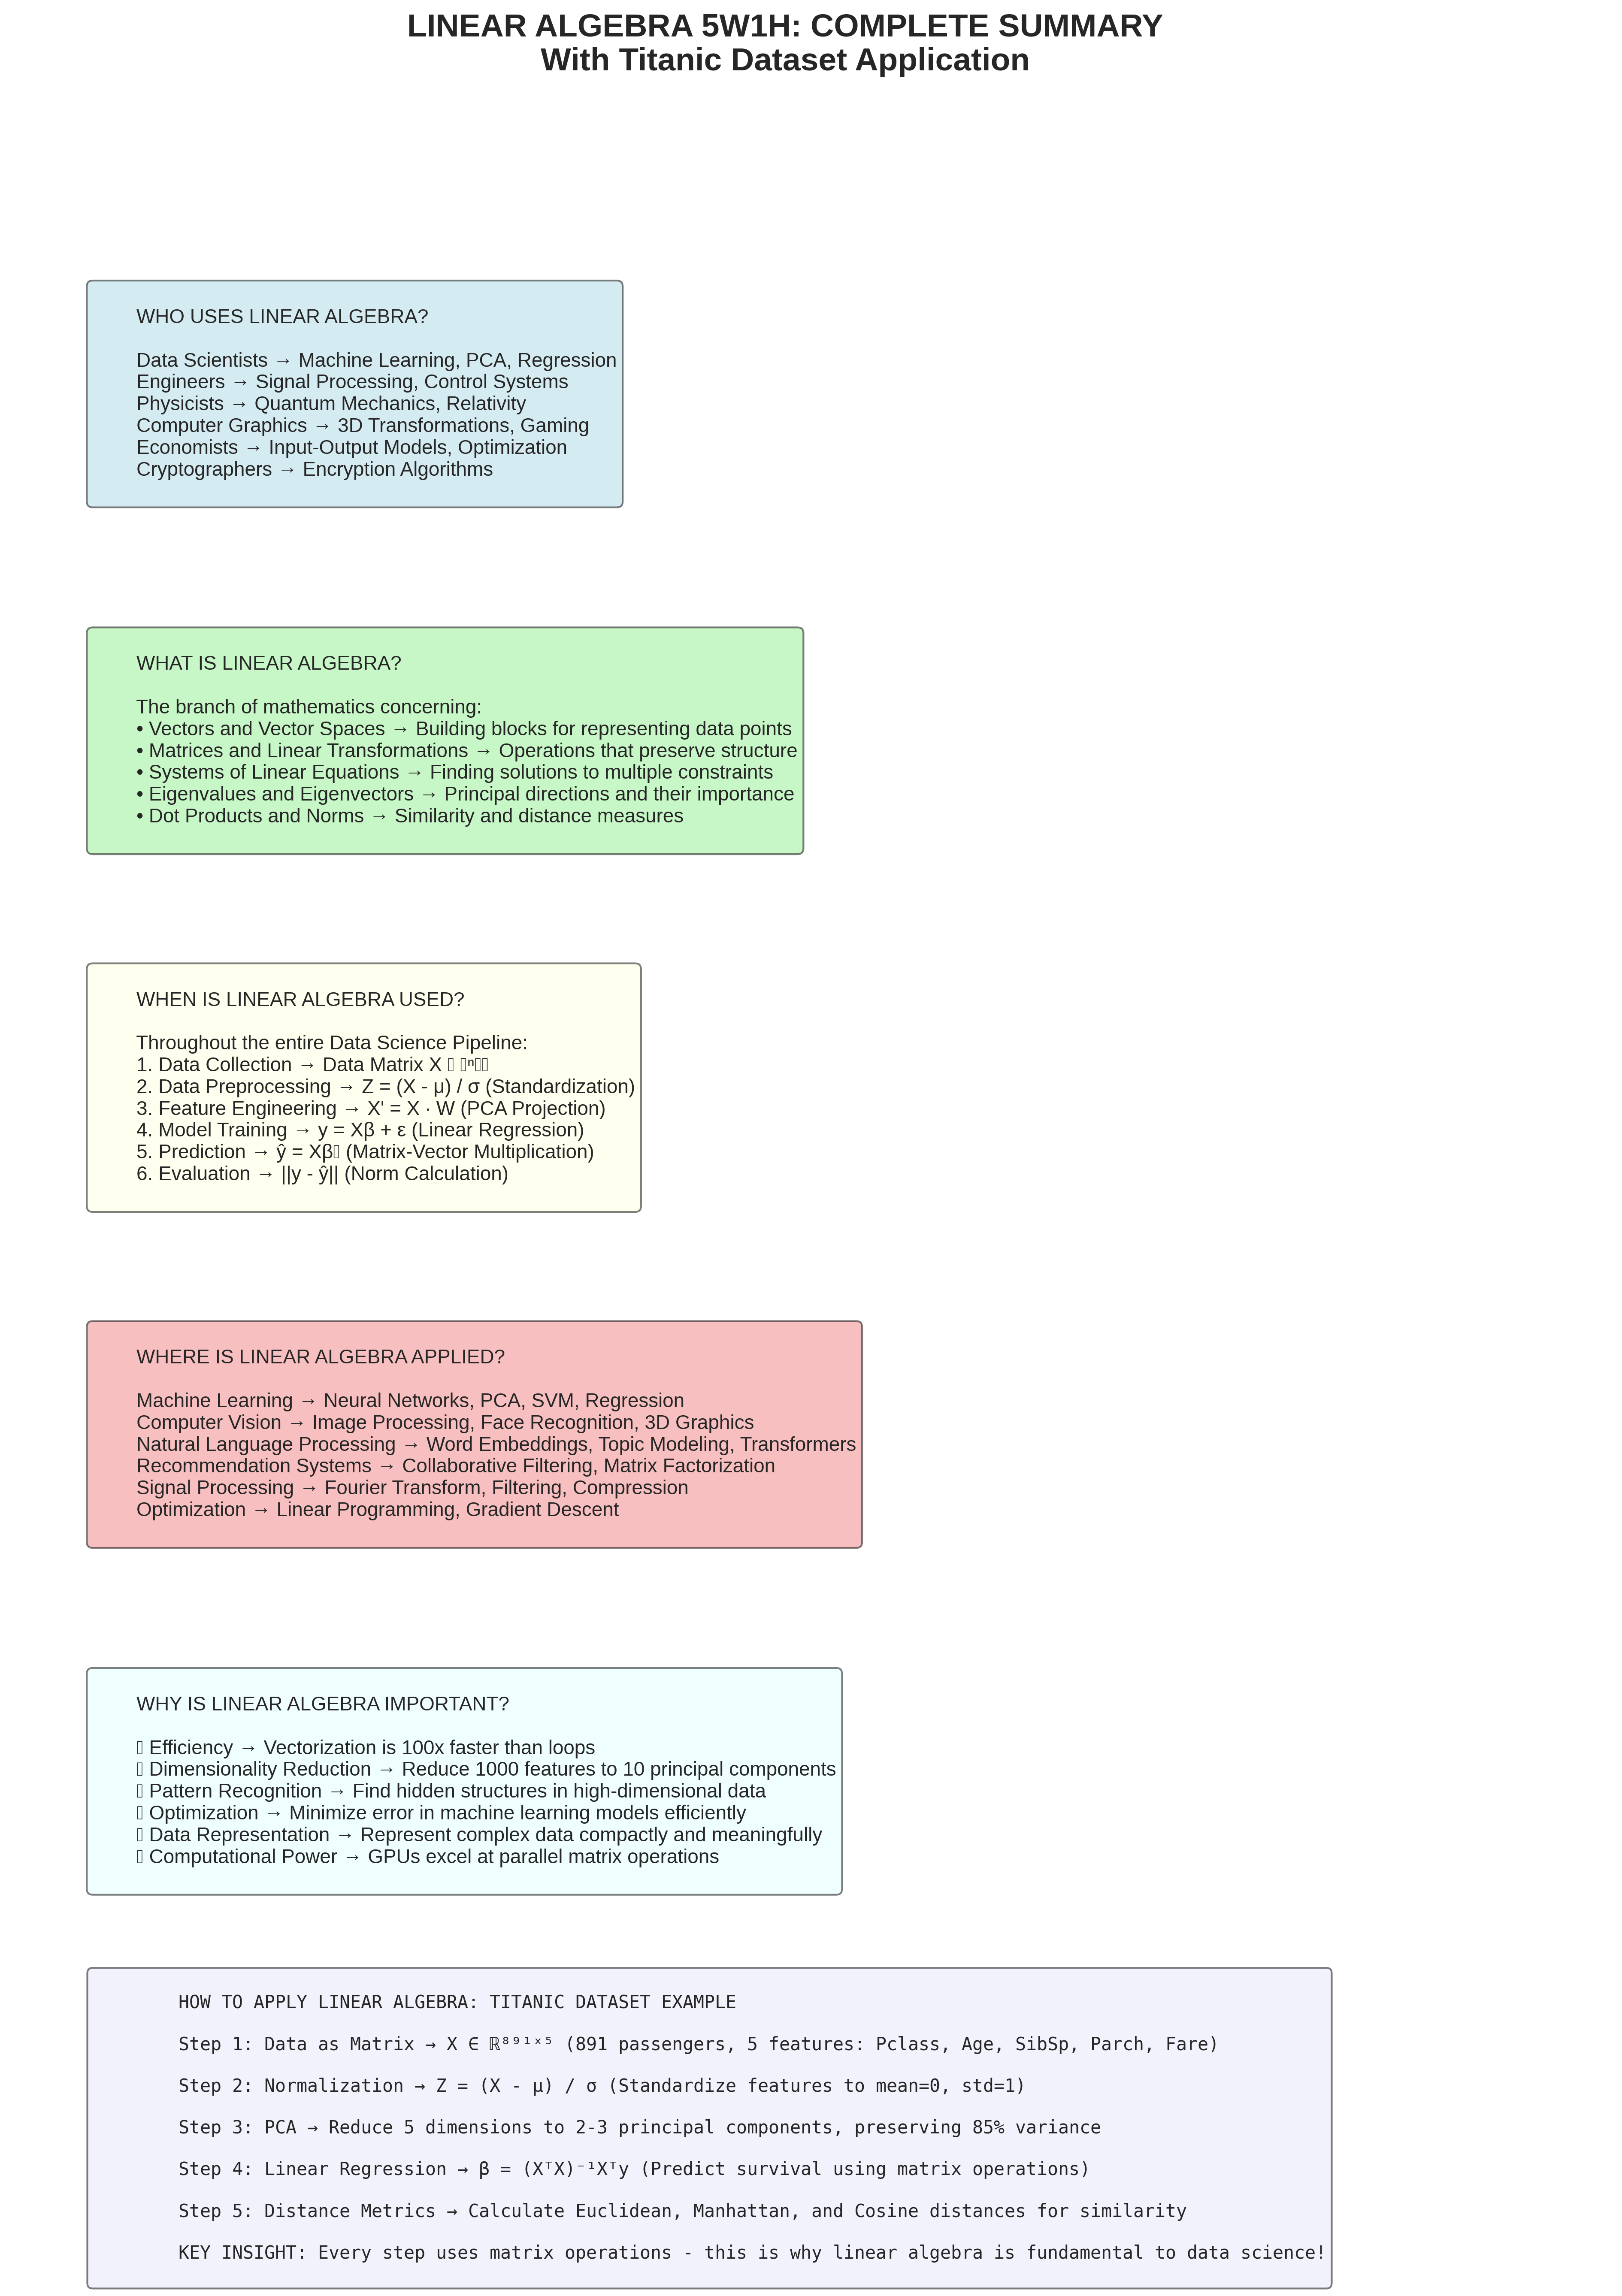

In [4]:
from IPython.display import Image, display
import os

output_dir = '/mnt/user-data/outputs/'
image_files = [
    '01_who_uses_linear_algebra.png',
    '02_what_is_linear_algebra.png',
    '03_when_is_linear_algebra_used.png',
    '04_where_is_linear_algebra_applied.png',
    '05_why_is_linear_algebra_important.png',
    '06_step1_data_matrix.png',
    '07_step2_normalization.png',
    '08_step3_pca.png',
    '09_step4_regression.png',
    '10_step5_distance_metrics.png',
    '11_complete_summary.png'
]

print("Displaying generated visuals:")
for filename in image_files:
    filepath = os.path.join(output_dir, filename)
    if os.path.exists(filepath):
        print(f"\n--- {filename} ---")
        display(Image(filename=filepath))
    else:
        print(f"\n--- {filename} (Not Found) ---")
        print("Image file not found. Please ensure the main script ran successfully and created all files.")
